# <code style="background:yellow;color:black">Yulu Bikes Case Study</code>

<hr style="border: 1px solid gray;">

# <code style="background:yellow;color:black">About Yulu:</code>

**Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.**

**Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!**

<hr style="border: 1px solid gray;">

# <code style="background:yellow;color:black">Business Problem:</code>

**Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.**

#### <code style="background:yellow;color:black">The company wants to know:</code>

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

2. How well those variables describe the electric cycle demands?

<hr style="border: 1px solid gray;">

# <code style="background:yellow;color:black">Dataset:</code>

**The company collected the data of customers who used their services.** 

Dataset link: yulu_data.csv

**Column Profiling:**

* **datetime:** datetime

* **season:** season (1: spring, 2: summer, 3: fall, 4: winter)

* **holiday** : whether day is a holiday or not

* **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.

* **weather:**<br>
    1: Clear, Few clouds, partly cloudy<br>
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog<br>
    
* **temp:** temperature in Celsius

* **atemp:** feeling temperature in Celsius

* **humidity:** humidity

* **windspeed:** wind speed

* **casual:** count of casual users

* **registered:** count of registered users

* **count:** count of total rental bikes including both casual and registered

<hr style="border: 1px solid gray;">

## <code style="background:yellow;color:black">1. Define Problem Statement and perform Exploratory Data Analysis (EDA):</code>

### <code style="background:yellow;color:black">1A. Define Problem Statement:</code> 

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands?
3. Analyzing Factors Affecting Demand for Yulu's Shared Electric Cycles in India.

<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">1B. Perform Exploratory Data Analysis (EDA):</code> 

1. Importing the libraries.

2. Reading the dataset.

3. Looking at the dataset.

4. Observations on shape of data and examining structure of dataset.

5. Basic information about the dataset and checking data types of all the attributes.

6. Statistical summary.

7. Conversion of categorical attributes to 'category' (If required). 

8. Find what is the time period for which the data is given.

9. Missing value detection and perform Imputation using an appropriate method.

10. Identify and remove duplicate records.

11. Univariate Analysis (Distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables). Comment on these univariate plots.

12. Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count). Comment on these bivariate plots.

13. Check for Outliers and deal with them accordingly.

14. Establish a Relationship between Dependent and Independent Variables.

<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Importing Libraries:</code>

In [1]:
import numpy as np   # linear algebra

import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt  # data visualization

import seaborn as sns  # data visualization

import datetime as dt  # working with dates and times

import scipy.stats as spy  # statistical analysis

import statsmodels.api as sm  # statistical analysis

from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu  # perform hypothesis testing

import warnings  # control how warnings are handled 
warnings.filterwarnings('ignore') 

<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Reading the dataset:</code>

In [2]:
df = pd.read_csv('bike_sharing.csv')

<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Looking at the dataset:</code>

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Shape of the dataset:</code>

In [5]:
df.shape

(10886, 12)

In [6]:
print(f"# rows: {df.shape[0]} \n# columns: {df.shape[1]}")

# rows: 10886 
# columns: 12


<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Columns in the Dataset:</code>

In [7]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Datatype of the columns:</code>

In [8]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Basic information about the dataset: </code>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Basic statistical information about the dataset:</code> 

In [10]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### <code style="background:yellow;color:black">Observation-</code> 

- These statistics provide insights into the central tendency, spread, and range of the numerical features in the dataset.
- The difference between mean and median is much heigher in count columns hence finding out the outlier by using IQR technique and removing it would be good.

In [11]:
df.describe(include = 'object')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Datatype of following attributes needs to changed to proper data type:</code>

- **datetime** - to datetime
- **season** - to categorical
- **holiday** - to categorical
- **workingday** - to categorical
- **weather** - to categorical

In [12]:
df['datetime'] = pd.to_datetime(df['datetime'])

cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [13]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### <code style="background:yellow;color:black">Observation-</code> 

- There are no missing values in the dataset.
- **casual** and **registered** attributes might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.

In [14]:
df.describe(include = 'object')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [15]:
df.describe(include = 'datetime')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1
first,2011-01-01 00:00:00
last,2012-12-19 23:00:00


<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Find what is the time period for which the data is given:</code>

In [16]:
df['datetime'].min()

Timestamp('2011-01-01 00:00:00')

In [17]:
df['datetime'].max()

Timestamp('2012-12-19 23:00:00')

In [18]:
df['datetime'].max() - df['datetime'].min()

Timedelta('718 days 23:00:00')

### <code style="background:yellow;color:black">Observation-</code> 

* The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.

<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Missing value detection and perform imputation:</code>

In [19]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### <code style="background:yellow;color:black">Observation-</code> 

- **There are no missing values in the dataset.**

<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Identify and remove duplicate records:</code>

In [20]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10881    False
10882    False
10883    False
10884    False
10885    False
Length: 10886, dtype: bool

In [21]:
np.any(df.duplicated())

False

### <code style="background:yellow;color:black">Observation-</code> 

- **There are no duplicate values in the dataset.**

<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Univariate Analysis (Plots of all the <u>continuous variables</u>):</code>

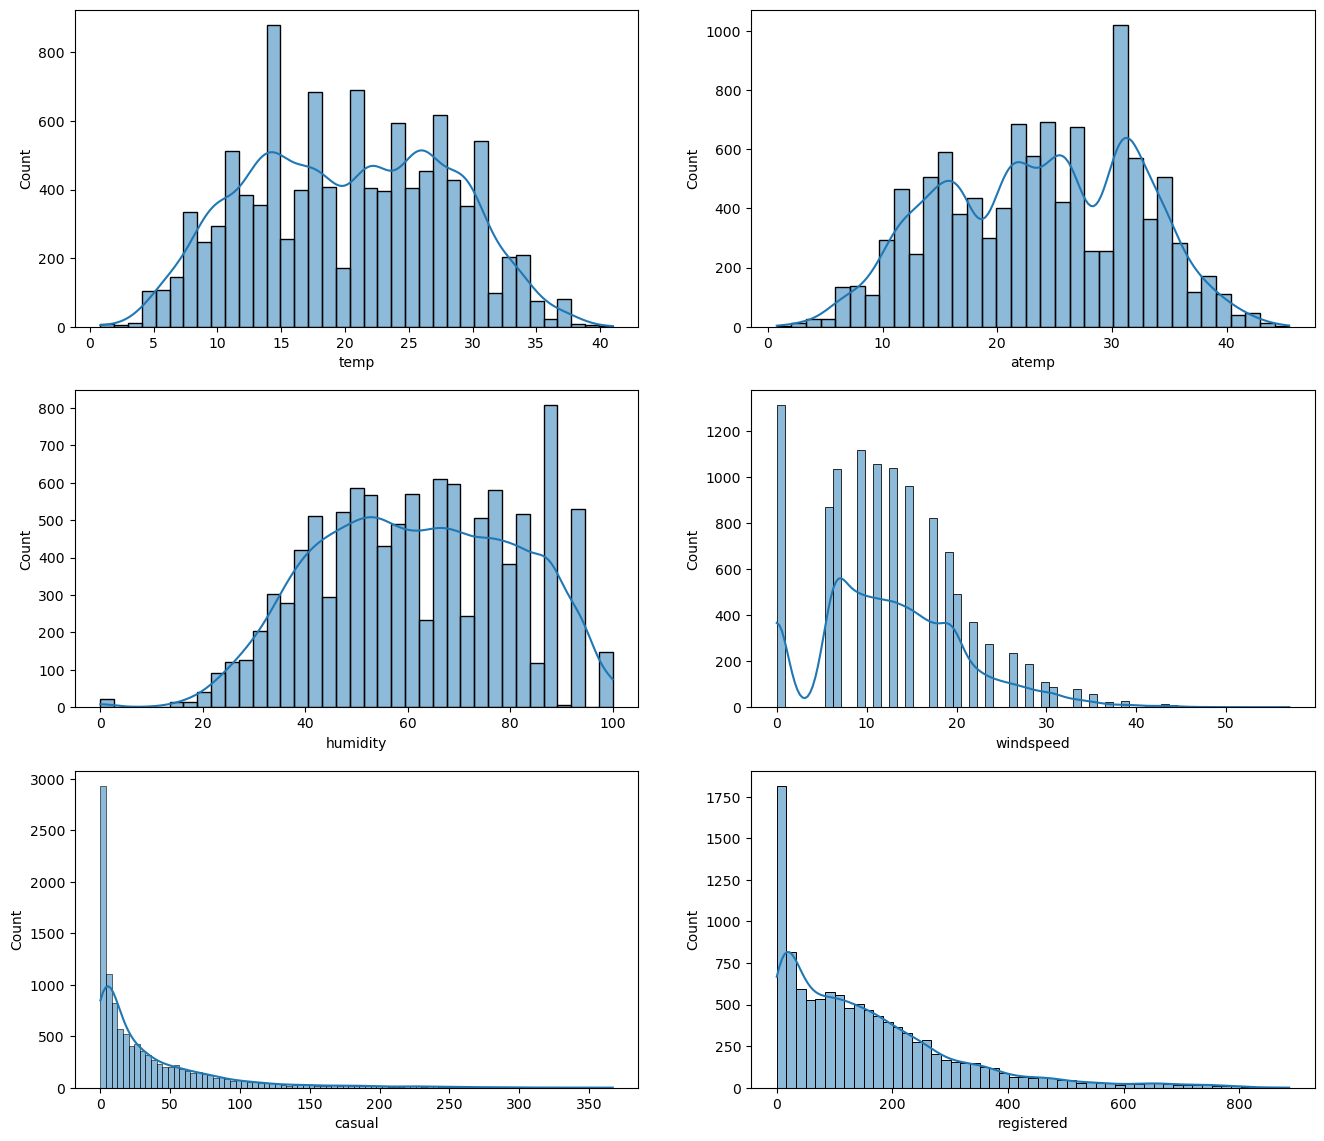

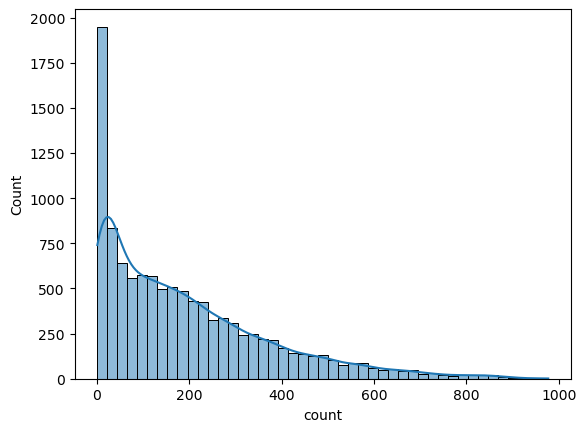

In [22]:
# Define the numerical columns
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows = 3,  # Create a 3x2 grid for subplots
                         ncols = 2, 
                         figsize = (16, 14))

index = 0

for row in range(3):  # Plotting histograms
    for col in range(2):
        sns.histplot(df[num_cols[index]], 
                     ax = axis[row, col], 
                     kde = True)
        index += 1
 
plt.show()  # Displaying the plots 
sns.histplot(df[num_cols[-1]], kde = True) 
plt.show()  # Displaying the plots 

### <code style="background:yellow;color:black">Observation-</code> 

- **casual**, **registered** and **count** somewhat looks like **Log Normal Distrinution**
- **temp**, **atemp** and **humidity** looks like they follows the **Normal Distribution**
- **windspeed** follows the **binomial distribution**

In [23]:
distribution_of_temperature = df["temp"].value_counts(bins = 5)
distribution_of_atemp = df["atemp"].value_counts(bins = 5)
distribution_of_humidity = df["humidity"].value_counts(bins = 5)
distribution_of_windspeed = df["windspeed"].value_counts(bins = 5)

print("Distribution of Temperature:")
print(distribution_of_temperature)
print("\nDistribution of Feeling Temperature:")
print(distribution_of_atemp)
print("\nDistribution of Humidity:")
print(distribution_of_humidity)
print("\nDistribution of Windspeed:")
print(distribution_of_windspeed)

Distribution of Temperature:
(16.892, 24.928]    3340
(8.856, 16.892]     3331
(24.928, 32.964]    3095
(0.779, 8.856]       717
(32.964, 41.0]       403
Name: temp, dtype: int64

Distribution of Feeling Temperature:
(18.638, 27.577]    3752
(27.577, 36.516]    3257
(9.699, 18.638]     2922
(36.516, 45.455]     505
(0.714, 9.699]       450
Name: atemp, dtype: int64

Distribution of Humidity:
(40.0, 60.0]      3564
(60.0, 80.0]      3382
(80.0, 100.0]     2302
(20.0, 40.0]      1560
(-0.101, 20.0]      78
Name: humidity, dtype: int64

Distribution of Windspeed:
(-0.058, 11.399]    5396
(11.399, 22.799]    4367
(22.799, 34.198]     976
(34.198, 45.598]     138
(45.598, 56.997]       9
Name: windspeed, dtype: int64


### <code style="background:yellow;color:black">Observation-</code> 

- Maximum usage of bike is under temp 8.85 to 32.96 (temperature in Celsius)
- Maximum usage of bike is under temp 18.64 to 36.52(feeling temperature in Celsius)
- Maximum renting of cycles is done under the humidity between 40 to 80
- Maximum renting of cycles is done under the wind speed of range -0.058 to 22.799

<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Univariate Analysis (Plots of all the <u>categorical variables</u>):</code>

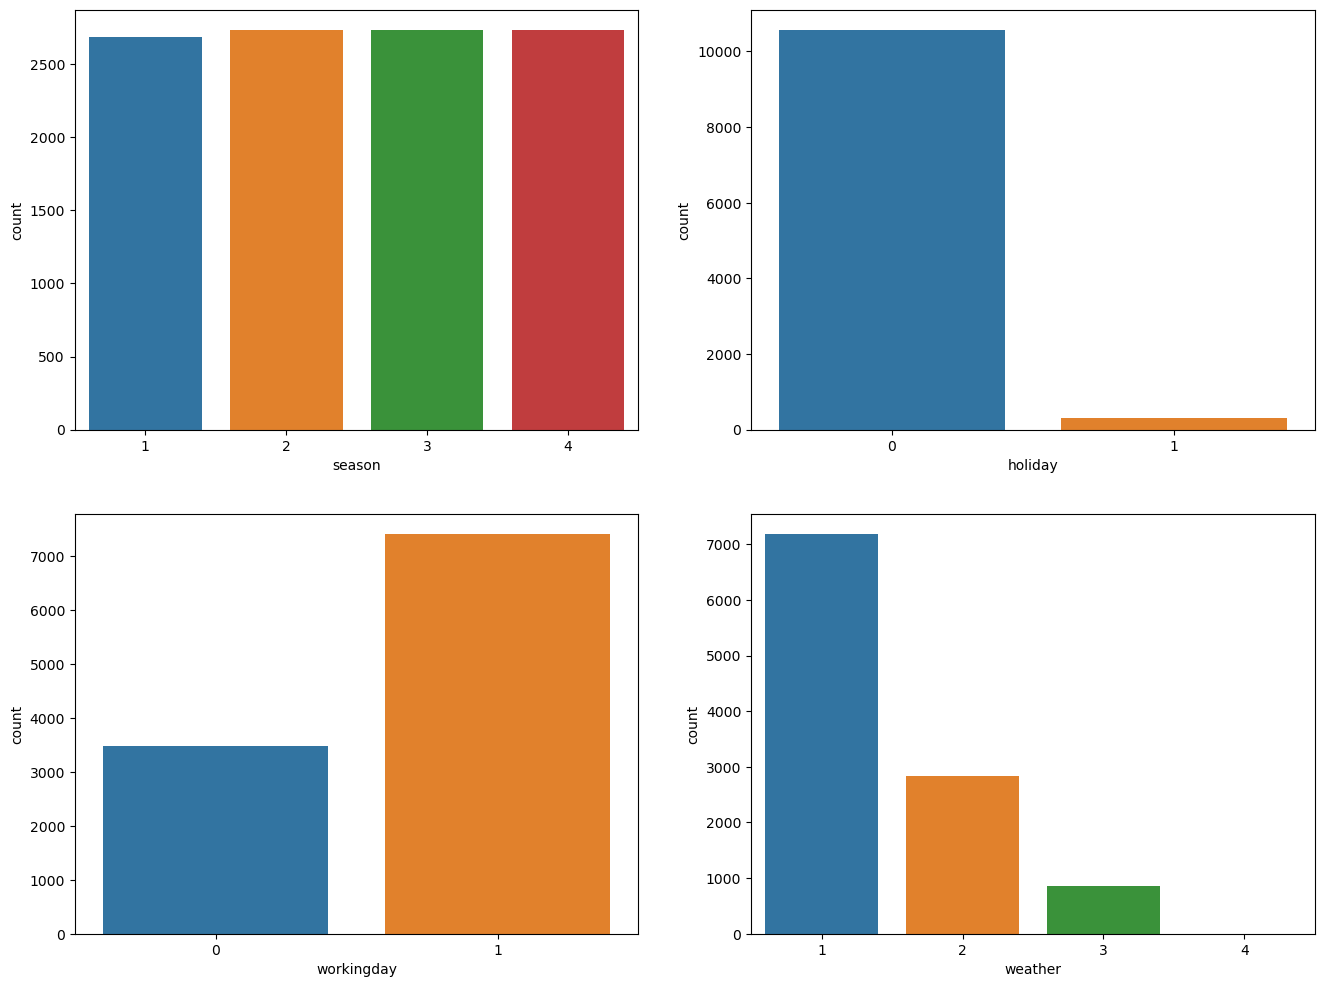

In [24]:
# Define the categorical columns
cat_cols = ['season', 'holiday', 'workingday', 'weather']

fig, axis = plt.subplots(nrows = 2,  # Create a 2x2 grid for subplots
                         ncols = 2, 
                         figsize = (16, 12))

index = 0

for row in range(2):  # Plotting countplots
    for col in range(2):
        sns.countplot(data = df, 
                      x = cat_cols[index], 
                      ax = axis[row, col])
        index += 1
        
plt.show()  # Displaying the plots

<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Univariate Analysis (Pie charts of all the <u>categorical variables</u>):</code>

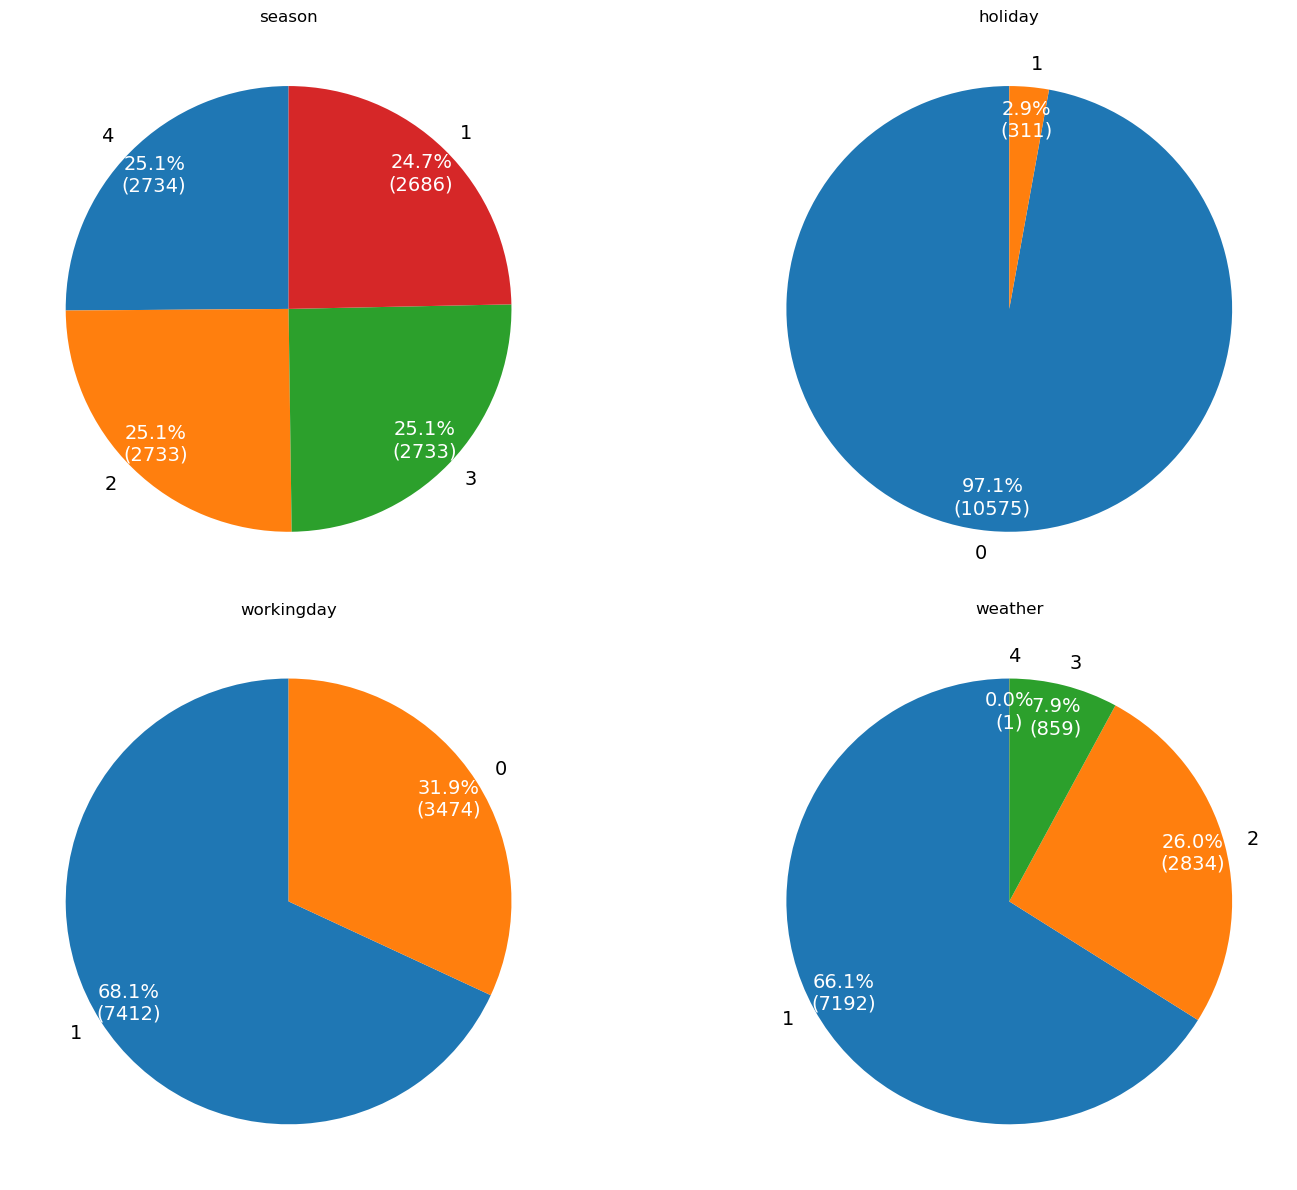

In [25]:
# Define the categorical columns
cat_cols = ['season', 'holiday', 'workingday', 'weather']

fig, axis = plt.subplots(nrows = 2,  # Create a 2x2 grid for subplots
                         ncols = 2, 
                         figsize = (16, 12))

index = 0

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val})'
    return my_format

for row in range(2):
    for col in range(2):
        counts = df[cat_cols[index]].value_counts()  # Count the occurrences of each category
        
        # Create a pie chart with customized percentage formatting
        wedges, texts, autotexts = axis[row, col].pie(
            counts, 
            labels = counts.index, 
            autopct = autopct_format(counts),
            startangle = 90, 
            textprops = {'fontsize': 14}, 
            pctdistance = 0.85
        )
        
        for autotext in autotexts:  # Increase the font size of the percentage labels
            autotext.set_fontsize(14)
            autotext.set_color('white')
        
        axis[row, col].set_title(cat_cols[index])
        
        index += 1

plt.tight_layout()
plt.show()  # Displaying the plots

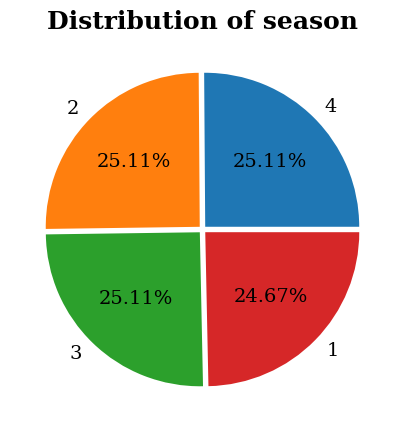

In [26]:
plt.figure(figsize = (5, 5))  # Setting the figure size to 5x5     

# Setting the title of the plot
plt.title('Distribution of season', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'normal',
                                                'fontfamily' : 'serif'})

df_season = np.round(df['season'].value_counts(normalize = True) * 100, 2).to_frame()

plt.pie(x = df_season['season'],  # Plotting the pie-chart
        explode = [0.025, 0.025, 0.025, 0.025], 
        labels = df_season.index,
        autopct = '%.2f%%', 
        textprops = {'fontsize' : 14,
                     'fontstyle' : 'normal',
                     'fontfamily' : 'serif',
                     'fontweight' : 500})

plt.show()  # Displaying the plot    

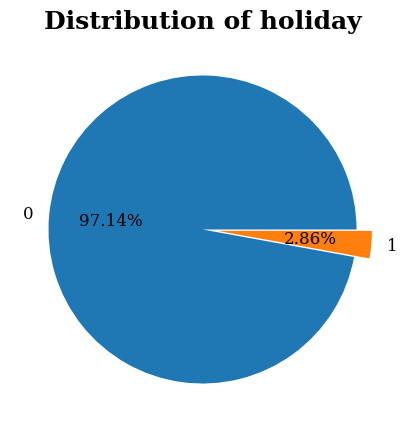

In [27]:
plt.figure(figsize = (5, 5))  # Setting the figure size to 5x5      

# Setting the title of the plot
plt.title('Distribution of holiday', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'normal',
                                                'fontfamily' : 'serif'})

df_holiday = np.round(df['holiday'].value_counts(normalize = True) * 100, 2).to_frame()

plt.pie(x = df_holiday['holiday'],  # Plotting the pie-chart
        explode = [0, 0.1], 
        labels = df_holiday.index,
        autopct = '%.2f%%', 
        textprops = {'fontsize' : 12,
                     'fontstyle' : 'normal',
                     'fontfamily' : 'serif',
                     'fontweight' : 500})

plt.show()  # Displaying the plot

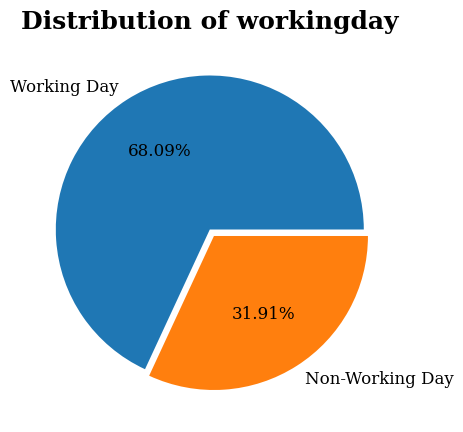

In [28]:
plt.figure(figsize = (5, 5))  # Setting the figure size to 5x5   

# Setting the title of the plot
plt.title('Distribution of workingday', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'normal',
                                                'fontfamily' : 'serif'})

df_workingday = np.round(df['workingday'].value_counts(normalize = True) * 100, 2).to_frame()

plt.pie(x = df_workingday['workingday'],  # Plotting the pie-chart
        explode = [0, 0.05], 
        labels = ['Working Day', 'Non-Working Day'], 
        autopct = '%.2f%%', 
        textprops = {'fontsize' : 12,
                     'fontstyle' : 'normal',
                     'fontfamily' : 'serif',
                     'fontweight' : 500})

plt.show()  # Displaying the plot        

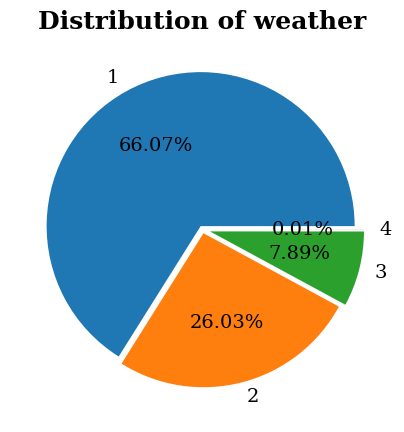

In [29]:
plt.figure(figsize = (5, 5))  # Setting the figure size to 5x5   

# Setting the title of the plot
plt.title('Distribution of weather', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'normal',
                                                'fontfamily' : 'serif'})

df_weather = np.round(df['weather'].value_counts(normalize = True) * 100, 2).to_frame()

plt.pie(x = df_weather['weather'],  # Plotting the pie-chart
        explode = [0.025, 0.025, 0.05, 0.05], 
        labels = df_weather.index, 
        autopct = '%.2f%%', 
        textprops = {'fontsize' : 14,
                   'fontstyle' : 'normal',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.show()  # Displaying the plot        

In [30]:
distribution_of_season = df['season'].value_counts()
distribution_of_holiday = df['holiday'].value_counts()
distribution_of_workingday = df['workingday'].value_counts()
distribution_of_weather = df['weather'].value_counts()

print("Distribution of Season:")
print(distribution_of_season)
print("\nDistribution of Holiday:")
print(distribution_of_holiday)
print("\nDistribution of Working day:")
print(distribution_of_workingday)
print("\nDistribution of Weather:")
print(distribution_of_weather)

Distribution of Season:
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

Distribution of Holiday:
0    10575
1      311
Name: holiday, dtype: int64

Distribution of Working day:
1    7412
0    3474
Name: workingday, dtype: int64

Distribution of Weather:
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


### <code style="background:yellow;color:black">Observation-</code> 

- In each season count of renting cycles is almost same at around 25%.
- Renting of yulu electric bikes on a holiday is extremely less at 2.9% than other days at 97.1%.
- Usage of yulu electric bikes on working day 68.1% is more than holidays including weekends 31.9%.
- Weather 1 & 2 has maximum usage of yulu electric bikes at 92.1% as compared to weather 3 & 4 at 7.9%. Details of weather 1, 2, 3 and 4 are mentioned in column profiling of the dataset.

<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Bivariate Analysis (Relationships between important variables):</code>

**Plotting categorical variables vs count using boxplots-**

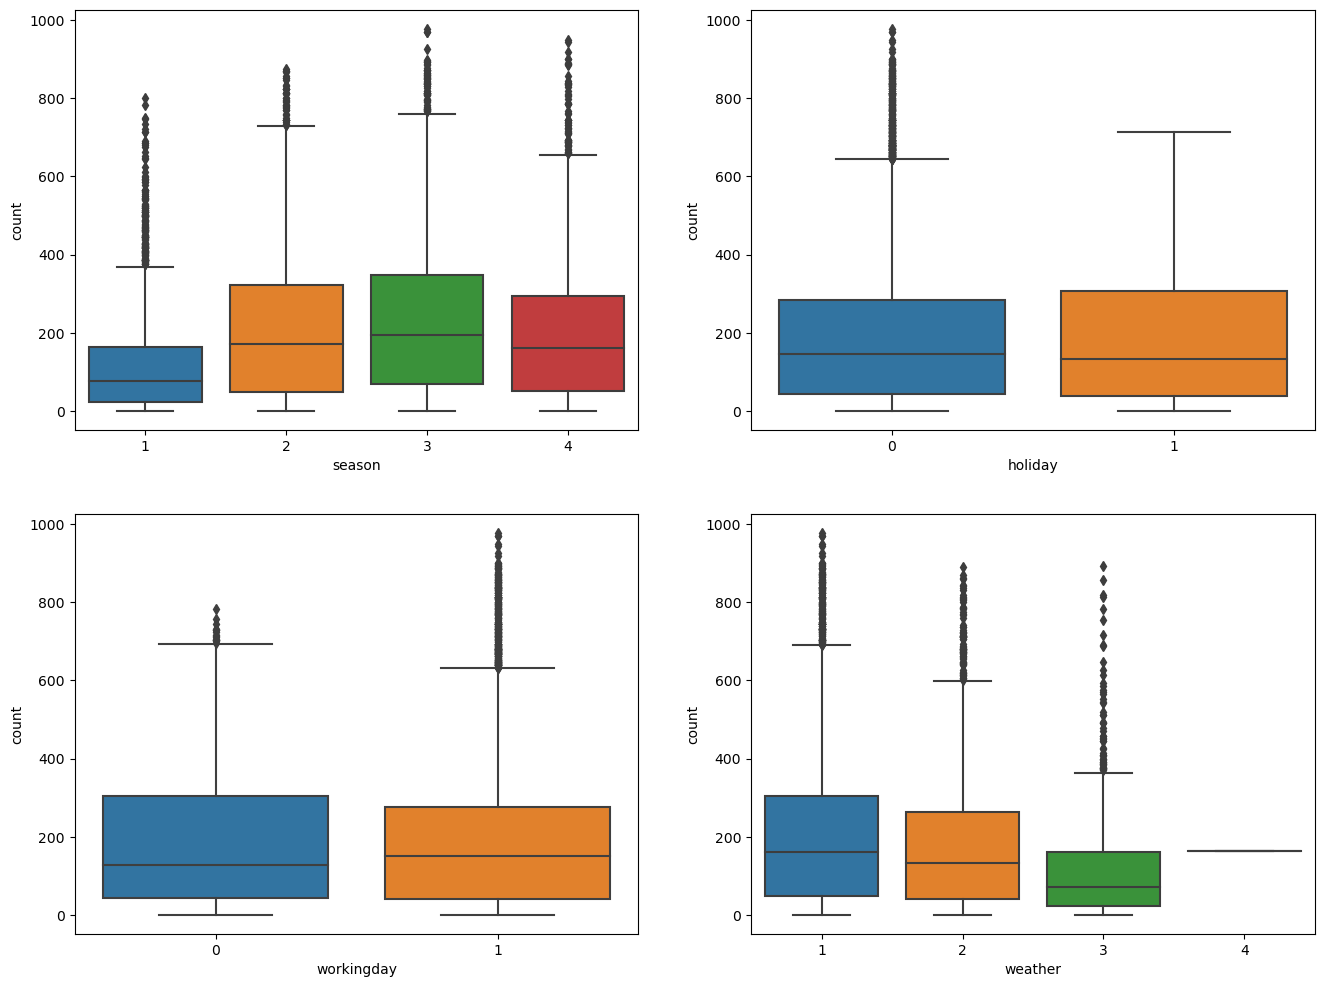

In [31]:
# Define the categorical columns
cat_cols = ['season', 'holiday', 'workingday', 'weather']

fig, axis = plt.subplots(nrows = 2,  # Setting the figure size to 2x2
                         ncols = 2, 
                         figsize = (16, 12))

index = 0

for row in range(2):  # Plotting boxplots
    for col in range(2):
        sns.boxplot(data = df, 
                    x = cat_cols[index], 
                    y = 'count', 
                    ax = axis[row, col])
        index += 1


plt.show()  # Displaying the plots

**Plotting categorical variables vs count using KDE plots-**

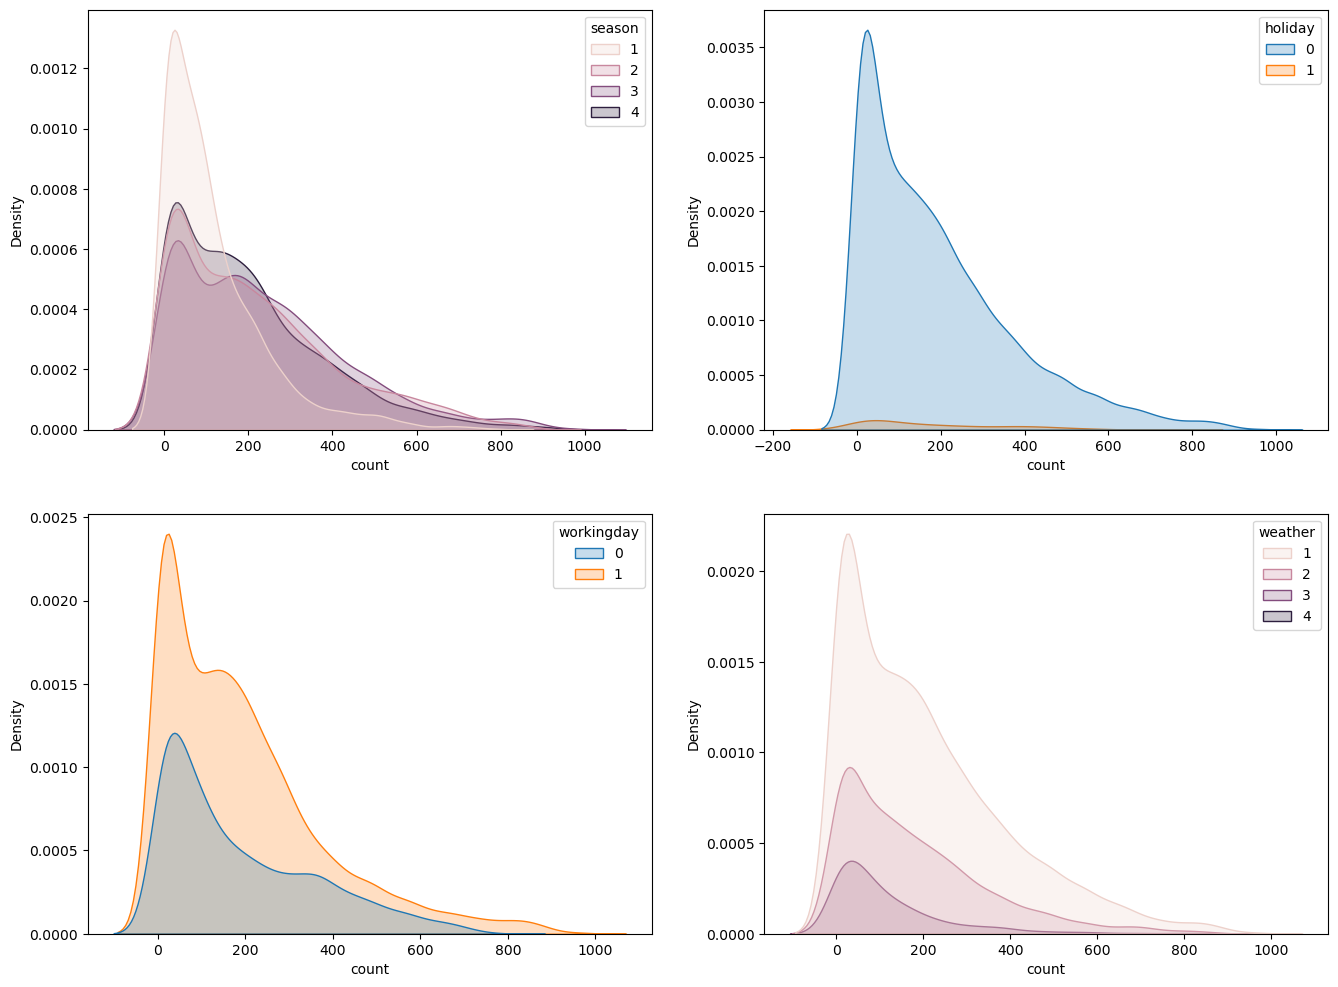

In [32]:
# Define the categorical columns
cat_cols = ['season', 'holiday', 'workingday', 'weather']

fig, axis = plt.subplots(nrows = 2,  # Setting the figure size to 2x2
                         ncols = 2, 
                         figsize = (16, 12))

index = 0

for row in range(2):  # Plotting KDE plots
    for col in range(2):
        sns.kdeplot(x = 'count',
            data = df,
            hue = cat_cols[index],
            color = 'green',
            shade = True,
            ax = axis[row, col])
        
        index += 1

plt.show() # Displaying the plots 

### <code style="background:yellow;color:black">Observation-</code> 

- In **summer** and **fall** seasons more bikes are rented as compared to other seasons.
- Whenever its a **holiday** more bikes are rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
- Whenever there is **rain, thunderstorm, snow or fog**, there were less bikes were rented.

**Plotting numerical variables vs count using scatterplot-**

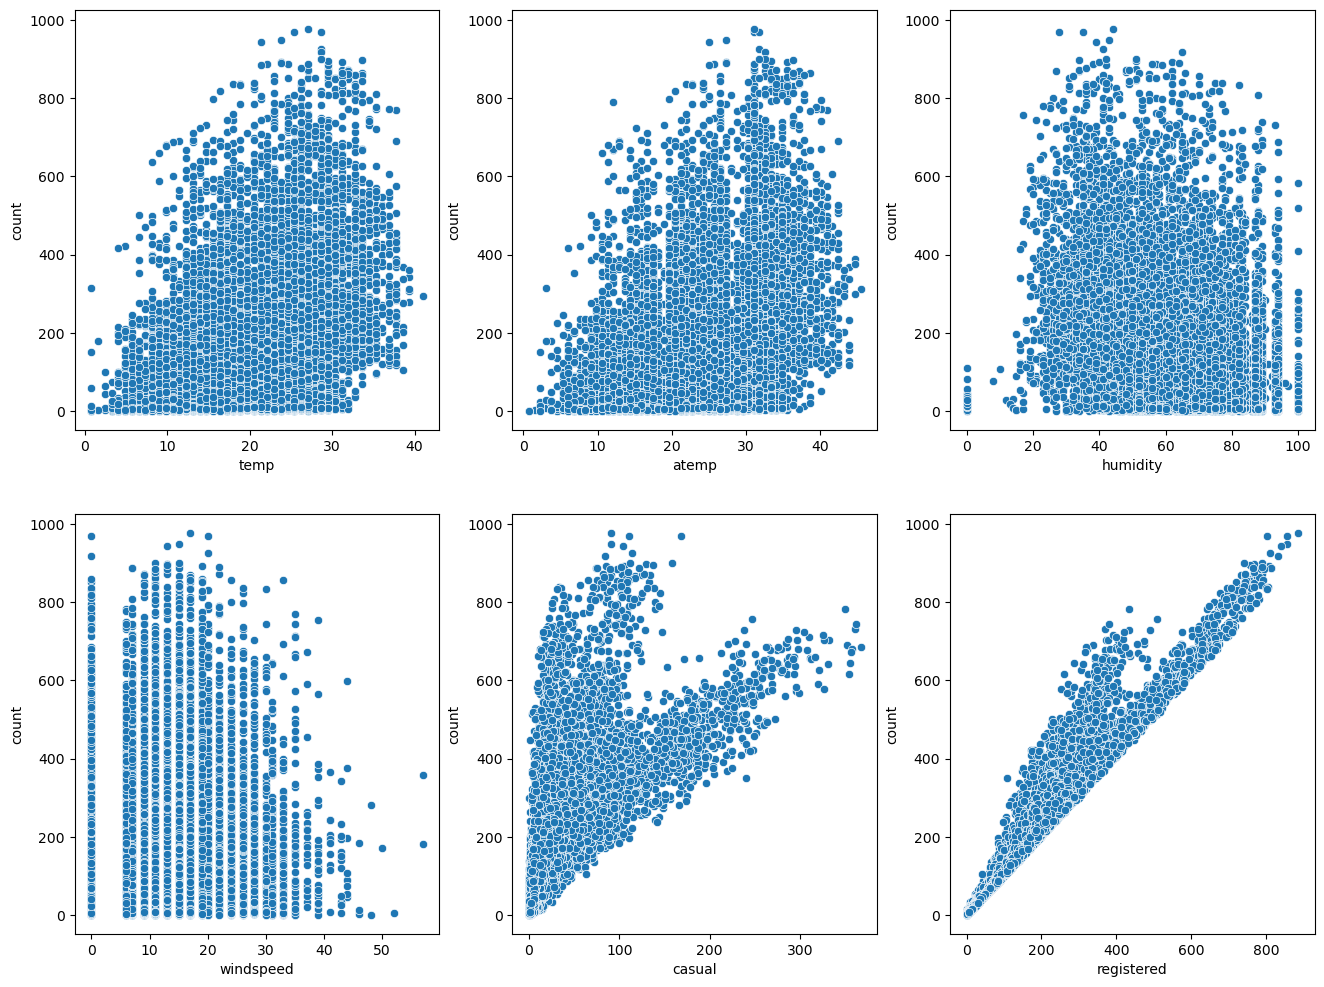

In [33]:
# Define the numerical columns
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows = 2,  # Setting the figure size to 2x3
                         ncols = 3, 
                         figsize = (16, 12))

index = 0

for row in range(2):  # Plotting scatterplots
    for col in range(3):
        sns.scatterplot(data = df, 
                        x = num_cols[index], 
                        y = 'count', 
                        ax = axis[row, col])
        index += 1

plt.show()  # Displaying the plots 

### <code style="background:yellow;color:black">Observation-</code> 

- Whenever the humidity is less than 20, number of bikes rented is very very low.
- Whenever the temperature is less than 10, number of bikes rented is less.
- Whenever the windspeed is greater than 35, number of bikes rented is less.

**Plotting count vs season, workingday using boxplot-**

[]

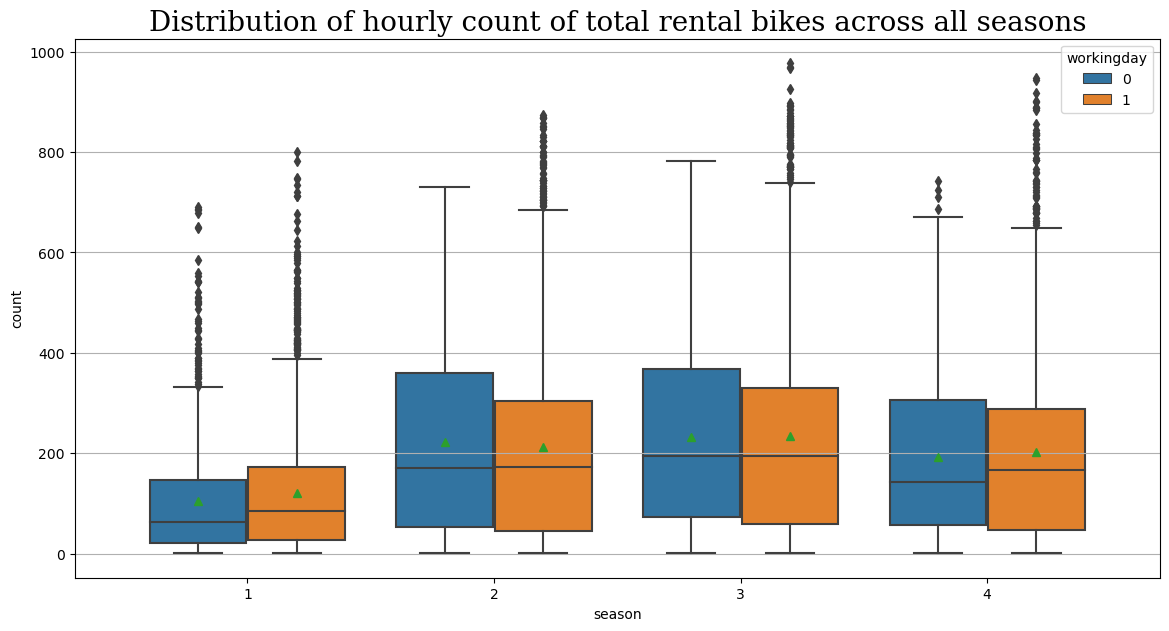

In [34]:
plt.figure(figsize = (14, 7))  # Setting the figure size to 14x7

# Setting the title of the plot
plt.title('Distribution of hourly count of total rental bikes across all seasons',
         fontdict = {'size' : 20,
                    'style' : 'normal',
                    'family' : 'serif'})

sns.boxplot(data = df,  # Plotting boxplots
            x = 'season', 
            y = 'count', 
            hue = 'workingday', 
            showmeans = True)

plt.grid(axis = 'y', linestyle = '-')
plt.plot()  # Displaying the plots

### <code style="background:yellow;color:black">Observation-</code> 

- The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

**Plotting count vs weather, workingday using boxplot-**

[]

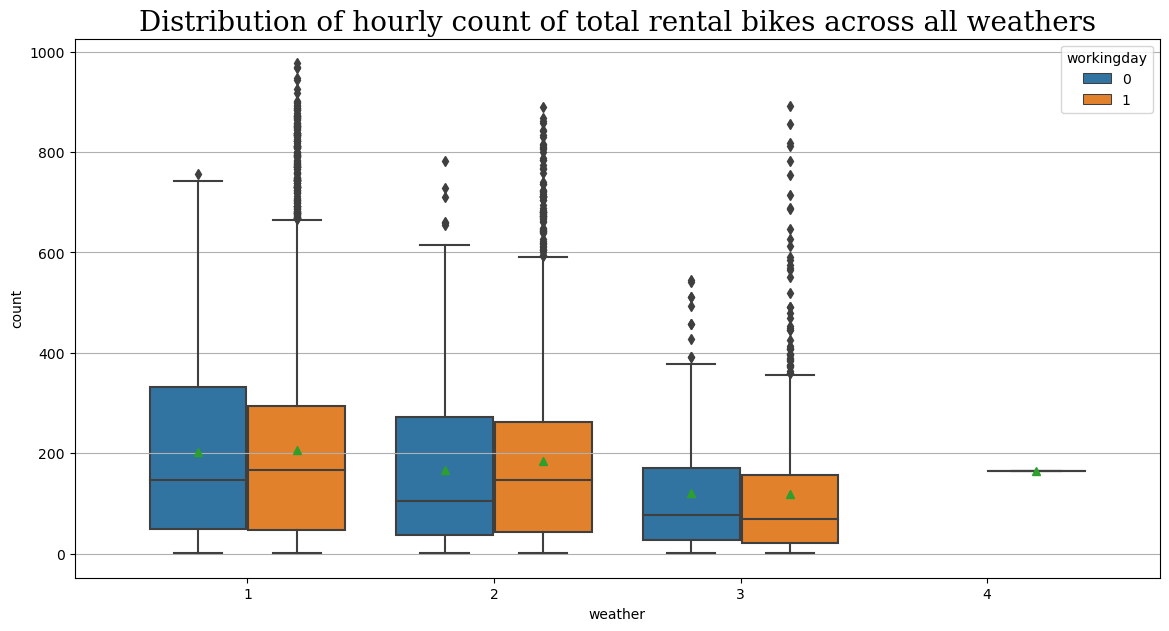

In [35]:
plt.figure(figsize = (14, 7))  # Setting the figure size to 14x7

# Setting the title of the plot
plt.title('Distribution of hourly count of total rental bikes across all weathers',
         fontdict = {'size' : 20,
                    'style' : 'normal',
                    'family' : 'serif'})

sns.boxplot(data = df,  # Plotting boxplots
            x = 'weather', 
            y = 'count', 
            hue = 'workingday', 
            showmeans = True)

plt.grid(axis = 'y', linestyle = '-')
plt.plot()  # Displaying the plots

### <code style="background:yellow;color:black">Observation-</code> 

- The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

**Plotting jointplot of count, temperature and season-**

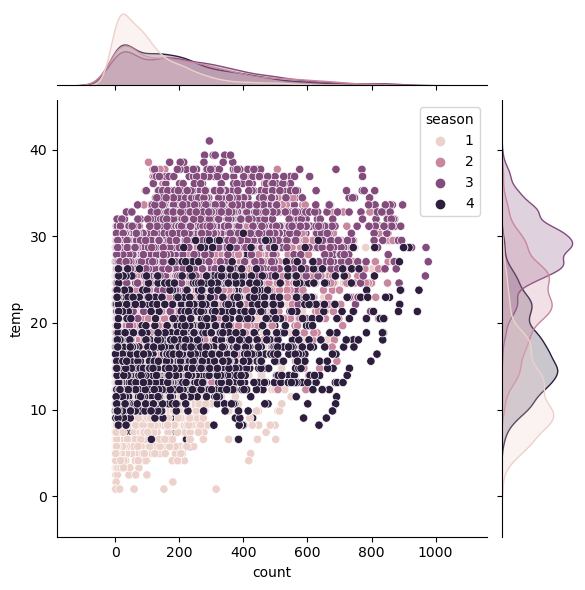

In [36]:
sns.jointplot(x = "count",  # Plotting jointplot of count, temperature and season
              y = "temp",
              data = df,
              hue = "season")

plt.show()  # Displaying the plot

**Plotting jointplot of count, temperature and workingday-**

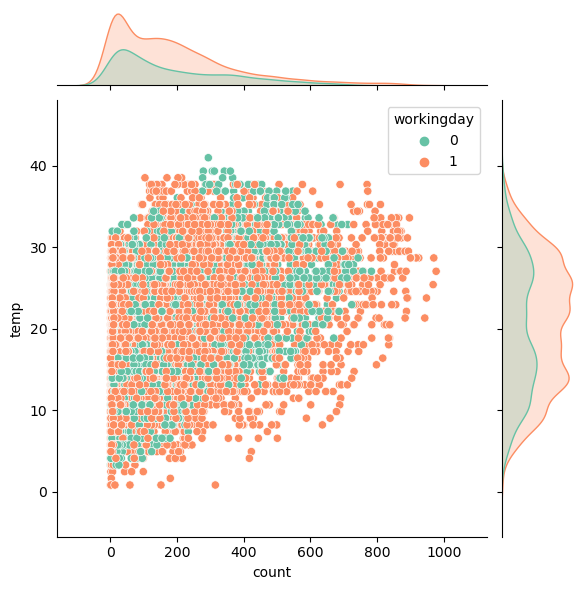

In [37]:
sns.jointplot(x = "count",  # Plotting jointplot of count, temperature and workingday
              y = "temp",
              data = df,
              hue = "workingday",
              palette = "Set2")

plt.show()  # Displaying the plot

**Plotting jointplot of count, temperature and weather-**

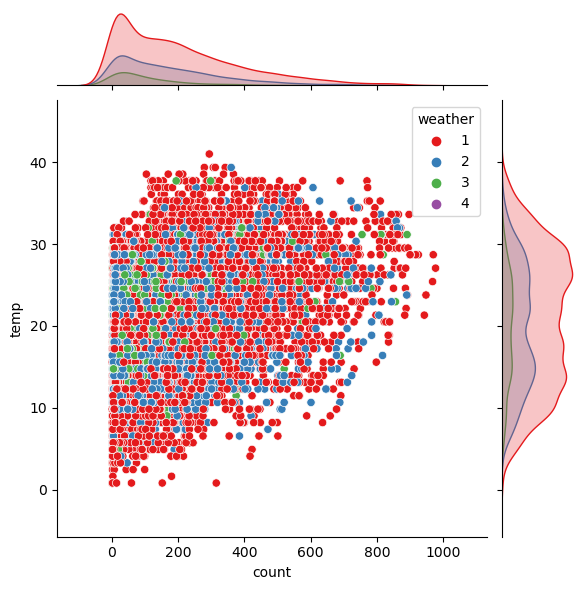

In [38]:
sns.jointplot(x = "count",  # Plotting jointplot of count, temperature and weather
              y = "temp",
              data = df,
              hue = "weather",
              palette = "Set1")

plt.show()  # Displaying the plot

### <code style="background:yellow;color:black">Observation-</code> 

- These plots gives us relationship of bike usage count vs temperature, season, workingday and weather variables

<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Check for Outliers and deal with them accordingly:</code>

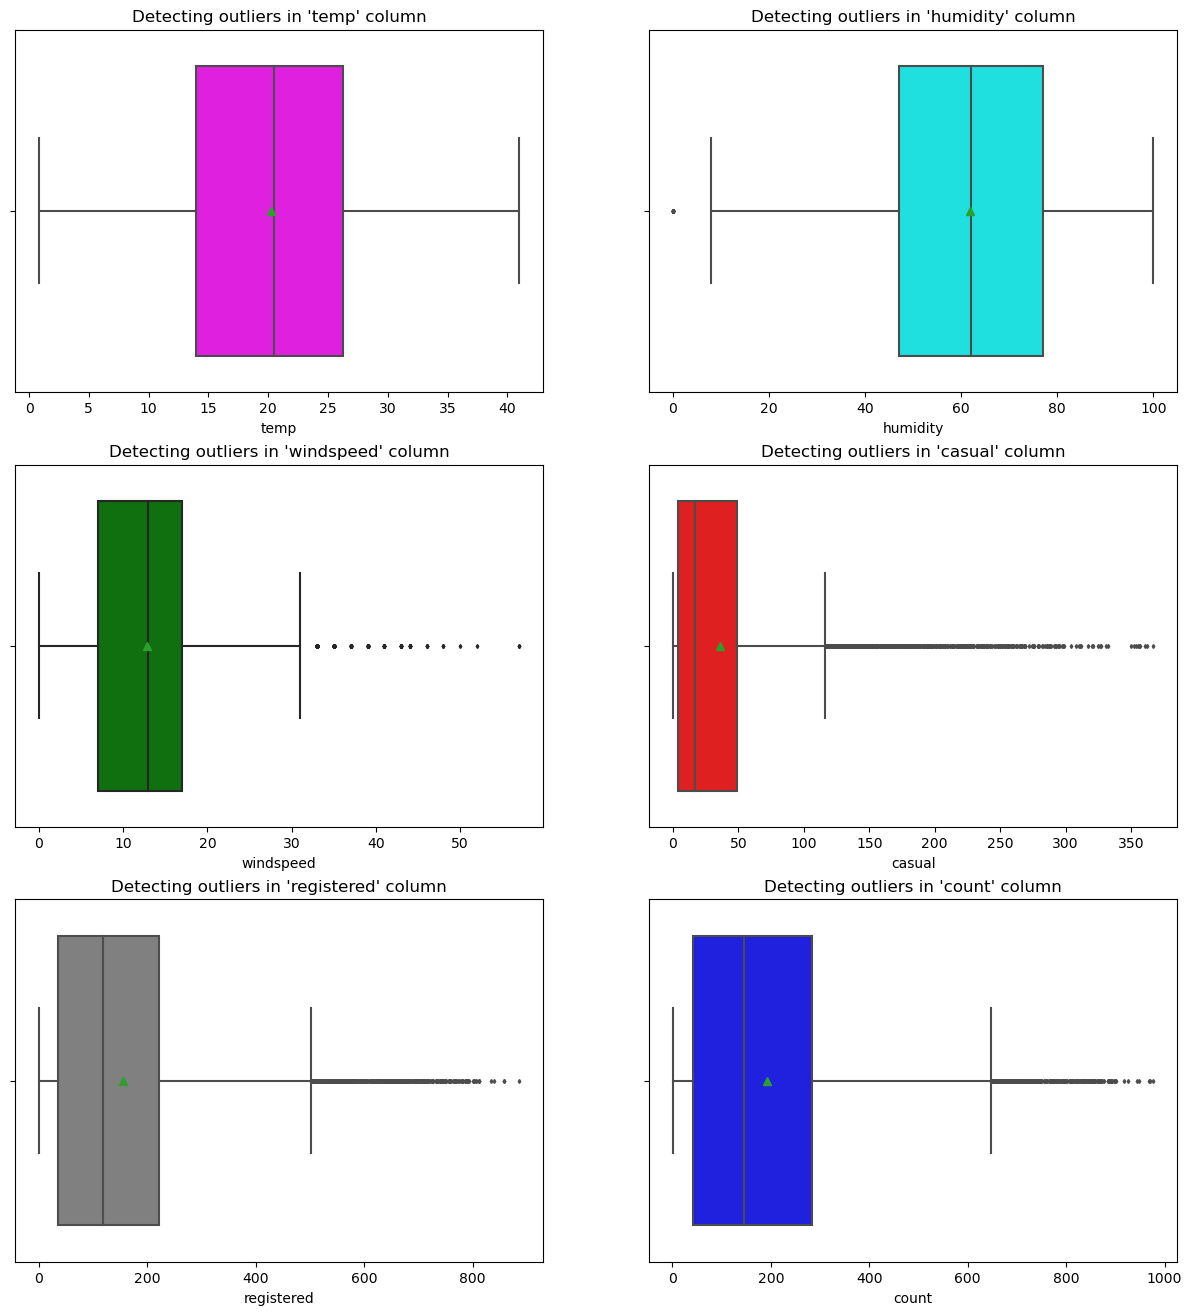

In [39]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
colors = np.random.permutation(['red', 'blue', 'green', 'magenta', 'cyan', 'gray'])
count = 1


plt.figure(figsize = (15, 16))  # Setting the figure size to 15x16

for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = df,  # Plotting boxplots
                x = df[i],
                color = colors[count - 1],
                showmeans = True,
                fliersize = 2)
    
    plt.plot()  # Displaying the plot
    count += 1

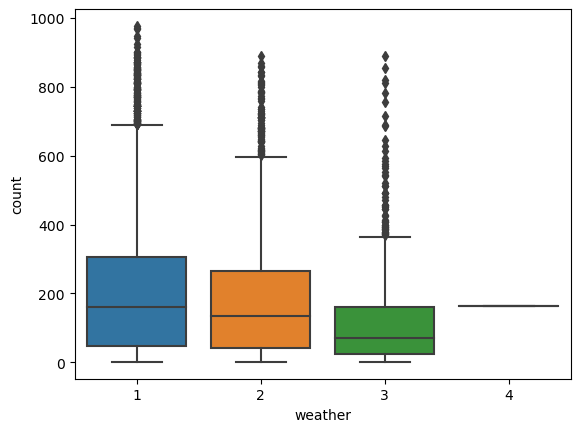

In [40]:
sns.boxplot(x = 'weather',  # Plotting the boxplot of weather and count
            y = 'count', 
            data = df)

plt.show()  # Displaying the plot

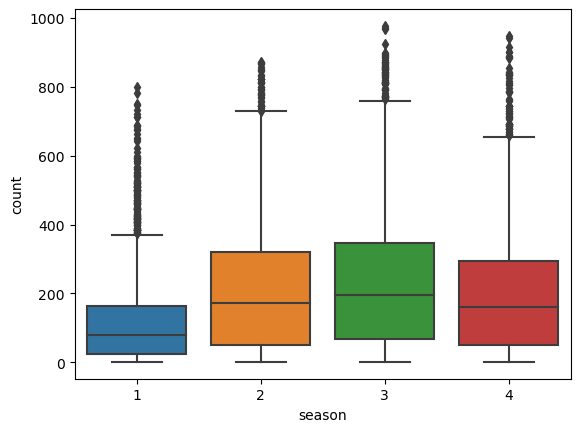

In [41]:
sns.boxplot(x = 'season',  # Plotting the boxplot of season and count
            y = 'count', 
            data = df)

plt.show()  # Displaying the plot

### <code style="background:yellow;color:black">Observation-</code> 

 - There is no outlier in the temp column.
 - There are few outliers present in humidity column.
 - There are many outliers present in each of the columns : windspeed, casual, registered, count.
 - count has outlier but we will retain because we want to do analysis on complete data.
 - Removal of outlier may be cause the data loss that's why we are retaining it
 - Each season has outliers we are retaing this in order to avoid the data loss.

<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Establish a Relationship between Dependent and Independent Variables:

In [42]:
corr_data = df.corr()
corr_data

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


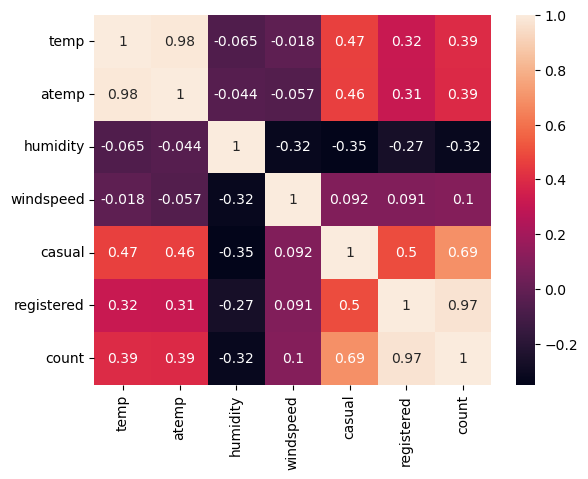

In [43]:
sns.heatmap(df.corr(),  # Plotting a correlation matrix 
            annot = True)

plt.show()  # Displaying the plot

### <code style="background:yellow;color:black">Observation-</code> 

- Here, count column seems to have positive correlation with atemp and and negative with humidity. Although they around only 30-40%. But we can see people go out with bike more when the temp is high and humidity is low. Seems expected.
 - Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered] 
 - High positively / negatively correlation (0.7 - 0.9) does not exist between any columns.
 - Moderate positive correlation (0.5 - 0.7) exists between columns [casual, count], [casual, registered].
 - Low Positive correlation (0.3 - 0.5) exists between columns [count, temp], [count, atemp], [casual, atemp]
 - Negligible correlation exists between all other combinations of columns. 

<hr style="border: 1px solid gray;">

## <code style="background:yellow;color:black">2. Hypothesis Testing:</code>

### <code style="background:yellow;color:black">Q1- Is any significant effect of Working Day on the number of bike rides?</code>

In [44]:
df.groupby(by = 'workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


[]

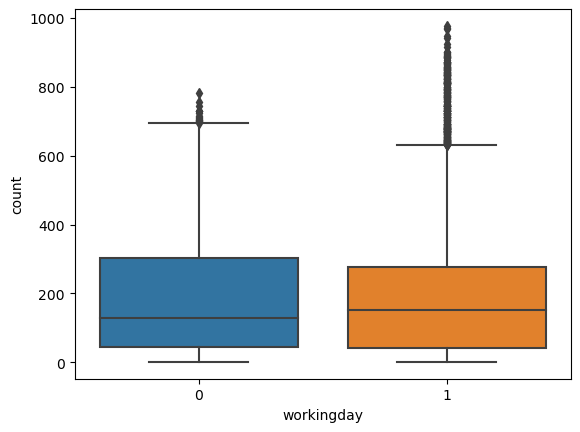

In [45]:
sns.boxplot(data = df,  # Plotting the boxplot for workingday 
            x = 'workingday', 
            y = 'count')

plt.plot()  # Displaying the plot

***STEP-1*** : Set up Null Hypothesis

  * **Null Hypothesis ( H0 )** - Working Day does not have any effect on the number of electric cycles rented. 

  * **Alternate Hypothesis ( HA )** - Working Day has some effect on the number of electric cycles rented

***STEP-2*** : Checking for basic assumpitons for the hypothesis

* Distribution check using **QQ Plot**
* Homogeneity of Variances using **Levene's test**

***STEP-3***: Define Test statistics; Distribution of T under H0.

* If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.


***STEP-4***: Compute the p-value and fix value of alpha.

* We set our ***alpha to be 0.05***

***STEP-5***: Compare p-value and alpha.

* Based on p-value, we will accept or reject H0.


  1.   **p-val > alpha** : Accept H0
  2.   **p-val < alpha** : Reject H0

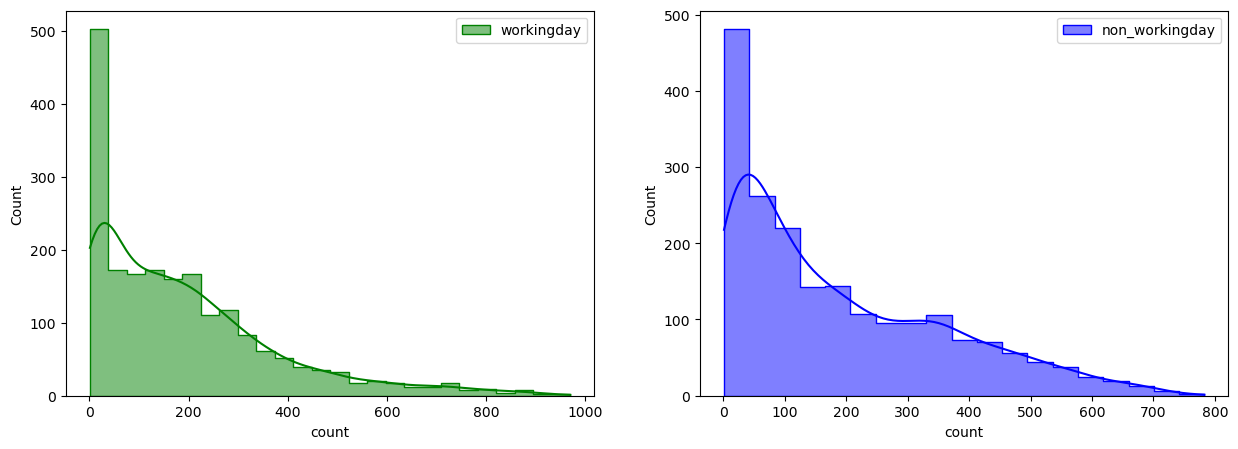

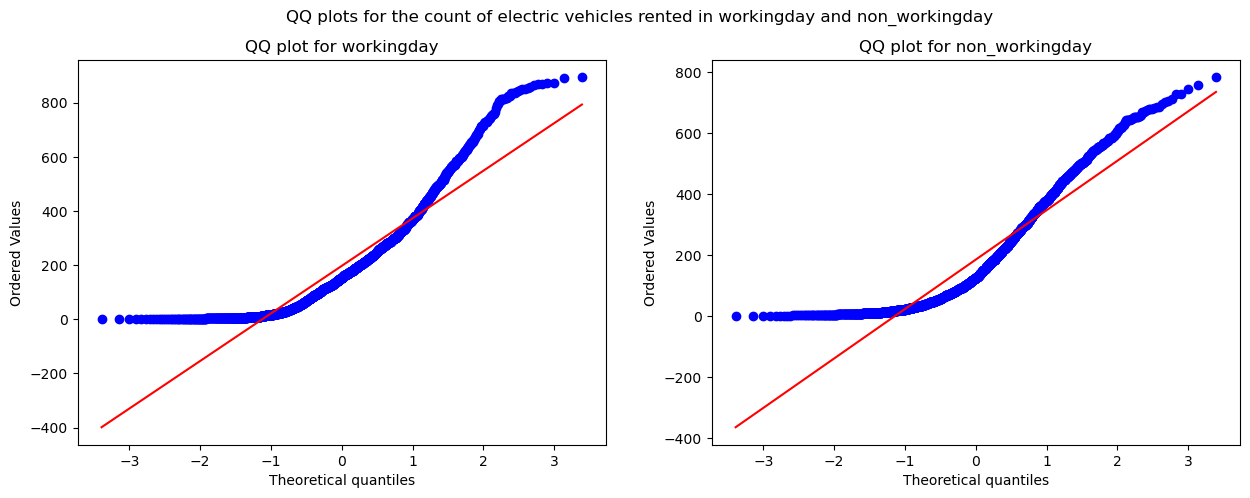

In [46]:
plt.figure(figsize = (15, 5))  # Plotting the matrix 15x5

plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['workingday'] == 1, 'count'].sample(2000),  # Histogram for working days
             element = 'step', 
             color = 'green', 
             kde = True, 
             label = 'workingday')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['workingday'] == 0, 'count'].sample(2000),  # Histogram for non-working days
             element = 'step', 
             color = 'blue', 
             kde = True, 
             label = 'non_workingday')
plt.legend()
plt.show()  # Displaying the plot

# QQ Plots
plt.figure(figsize = (15, 5))
plt.suptitle('QQ plots for the count of electric vehicles rented in workingday and non_workingday')

plt.subplot(1, 2, 1)
spy.probplot(df.loc[df['workingday'] == 1, 'count'].sample(2000),  # QQ plot for working days 
             plot = plt, 
             dist = 'norm')
plt.title('QQ plot for workingday')

plt.subplot(1, 2, 2)
spy.probplot(df.loc[df['workingday'] == 0, 'count'].sample(2000),  # QQ plot for non-working days
             plot = plt, 
             dist = 'norm')
plt.title('QQ plot for non_workingday')

plt.show()  # Displaying the plot

### <code style="background:yellow;color:black">Observation-</code> 

**It can be inferred from the above plot that the distributions do not follow normal distribution.**

### <code style="background:yellow;color:black">Next step-</code> 

**Applying Shapiro-Wilk test for normality:**
    
* $H_0$ : The sample **follows normal distribution**
* $H_a$ : The sample **does not follow normal distribution**
* alpha = 0.05
* Test Statistics : **Shapiro-Wilk test for normality**

In [47]:
# Applying Shapiro-Wilk test for normality for workingday
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 1, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 
    
    
# Applying Shapiro-Wilk test for normality for non workingday
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 1.0283821144017681e-38
The sample does not follow normal distribution

p-value 1.8377855822818154e-36
The sample does not follow normal distribution


### <code style="background:yellow;color:black">Next step-</code> 

**Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.**

In [48]:
transformed_workingday = spy.boxcox(df.loc[df['workingday'] == 1, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_workingday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 
    
    
transformed_non_workingday = spy.boxcox(df.loc[df['workingday'] == 0, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_non_workingday)
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.6132153862898905e-33
The sample does not follow normal distribution

p-value 8.133891151192298e-24
The sample does not follow normal distribution


### <code style="background:yellow;color:black">Observation-</code> 

**Even after applying the boxcox transformation on each of the "workingday" and "non_workingday" data, the samples do not follow normal distribution.**

### <code style="background:yellow;color:black">Next step-</code> 

**Homogeneity of Variances using Lavene's test.**

In [49]:
# Null Hypothesis(H0) - Homogenous Variance 
# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(df.loc[df['workingday'] == 1, 'count'].sample(2000),
                                df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 0.4707954208207549
The samples have Homogenous Variance 


### <code style="background:yellow;color:black">Next step-</code> 

**Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples:**

In [50]:
# Ho : Mean no.of electric cycles rented is same for working and non-working days
# Ha : Mean no.of electric cycles rented is not same for working and non-working days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = spy.mannwhitneyu(df.loc[df['workingday'] == 1, 'count'], 
                                      df.loc[df['workingday'] == 0, 'count'])
print('P-value :',p_value)
if p_value < 0.05:
    print('Reject H0')
else:
    print('Fail to reject the H0')
    print("\nNo difference between workingday and overall bikes cycles mean.")
    print("So there is no significant difference of rented bikes between workingdays and not workingdays.")

P-value : 0.9679139953914079
Fail to reject the H0

No difference between workingday and overall bikes cycles mean.
So there is no significant difference of rented bikes between workingdays and not workingdays.


### <code style="background:yellow;color:black">Observation-</code> 

**Therefore, there is no significant difference of rented bikes between workingdays and not workingdays. In other words, there is no significant difference between the number of bike rides on Weekdays and Weekends.**

<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Q2- Is the demand of bikes on rent the same for different Weather conditions?

In [51]:
df.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


[]

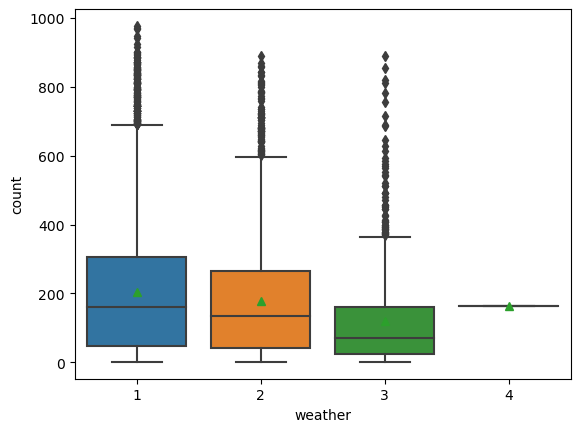

In [52]:
sns.boxplot(data = df,  # Plotting the boxplot for weather
            x = 'weather', 
            y = 'count', 
            showmeans = True)

plt.plot()  # Displaying the plot

In [53]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]

len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

***STEP-1*** : Set up Null Hypothesis

* **Null Hypothesis ( H0 )** - Mean of cycle rented per hour is same for weather 1, 2 and 3. 
(We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group)

* **Alternate Hypothesis ( HA )** -Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.

***STEP-2*** : Checking for basic assumpitons for the hypothesis

* Normality check using **QQ Plot**. If the distribution is not normal, use **BOX-COX transform** to transform it to normal distribution.

* Homogeneity of Variances using **Levene's test**

* Each observations are **independent**.

***STEP-3***: Define **Test statistics**

* The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

* **F = MSB / MSW**

* Under H0, the test statistic should follow **F-Distribution**.

***STEP-4***: Decide the kind of test.

* We will be performing **right tailed f-test**

***STEP-5***: Compute the **p-value** and fix value of alpha.

* We will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our **alpha to be 0.05**

***STEP-6***: Compare p-value and alpha.

* Based on p-value, we will accept or reject H0. 
    * **p-val > alpha** : Accept H0 
    * **p-val < alpha** : Reject H0

[]

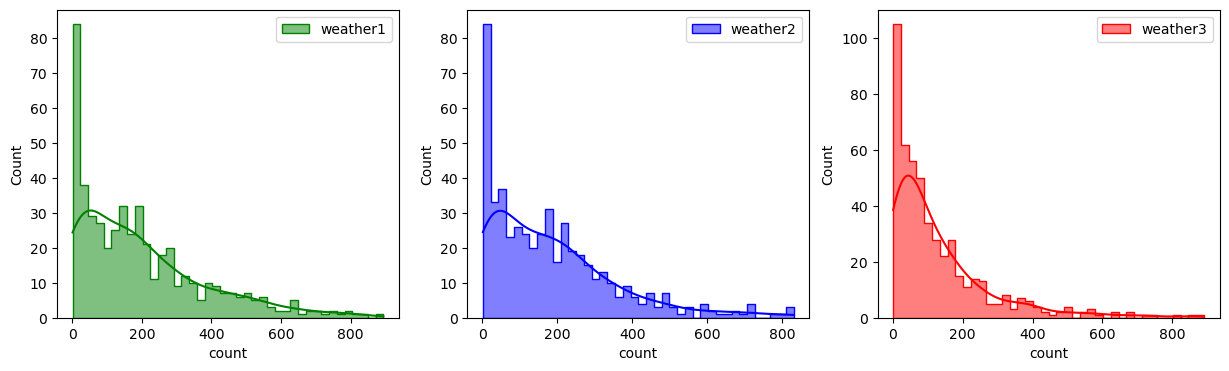

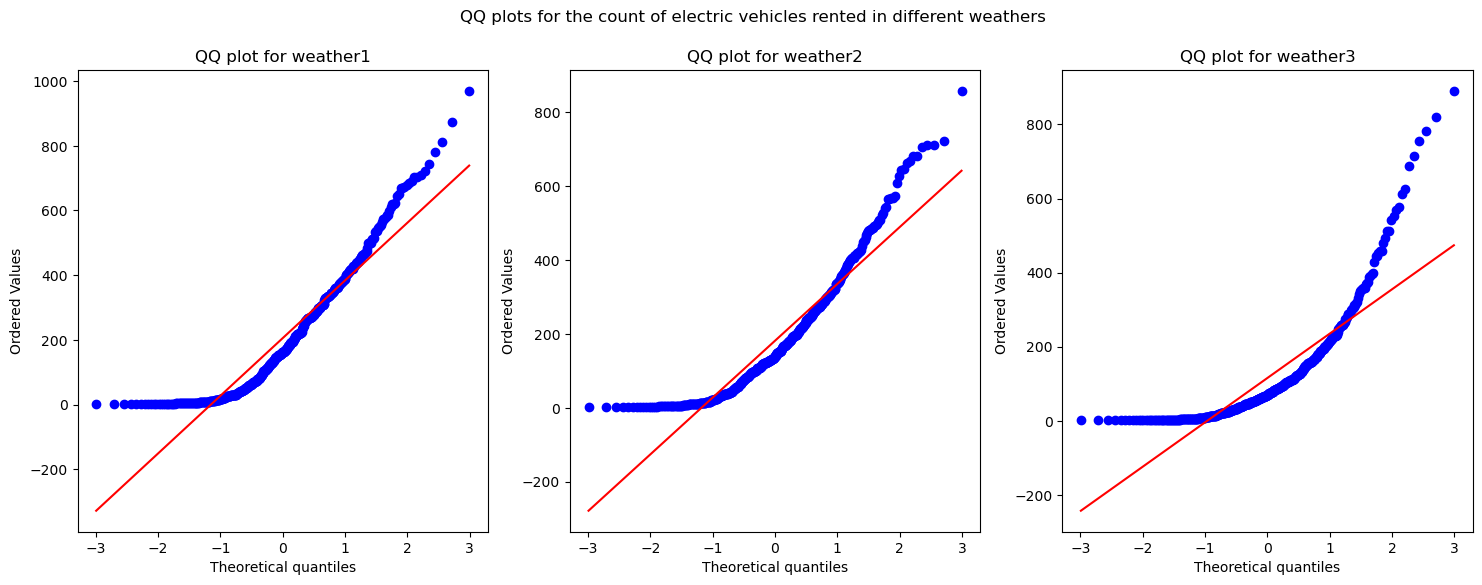

In [54]:
plt.figure(figsize = (15, 4))  # Plotting the matrix 15x4

plt.subplot(1, 3, 1)
sns.histplot(df_weather1.loc[:, 'count'].sample(500), bins = 40,  # Histogram for weather1
             element = 'step', color = 'green', kde = True, label = 'weather1')
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(df_weather2.loc[:, 'count'].sample(500), bins = 40,  # Histogram for weather2
             element = 'step', color = 'blue', kde = True, label = 'weather2')
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(df_weather3.loc[:, 'count'].sample(500), bins = 40,  # Histogram for weather3
             element = 'step', color = 'red', kde = True, label = 'weather3')
plt.legend()

plt.plot()

plt.figure(figsize = (18, 6))  # Plotting the matrix 18x6

plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')
spy.probplot(df_weather1.loc[:, 'count'].sample(500),  # QQ plot for weather1 
             plot = plt, 
             dist = 'norm')
plt.title('QQ plot for weather1')

plt.subplot(1, 3, 2)
spy.probplot(df_weather2.loc[:, 'count'].sample(500),  # QQ plot for weather2
             plot = plt, 
             dist = 'norm')
plt.title('QQ plot for weather2')

plt.subplot(1, 3, 3)
spy.probplot(df_weather3.loc[:, 'count'].sample(500),  # QQ plot for weather3
             plot = plt, 
             dist = 'norm')
plt.title('QQ plot for weather3')

plt.plot()  # Displaying the plot

### <code style="background:yellow;color:black">Observation-</code> 

**It can be inferred from the above plot that the distributions do not follow normal distribution.**

### <code style="background:yellow;color:black">Next step-</code> 

- **Applying Shapiro-Wilk test for normality** 
- $H_0$ : The sample **follows normal distribution**
- $H_1$ : The sample **does not follow normal distribution**
- alpha = 0.05
- Test Statistics : **Shapiro-Wilk test for normality**

In [55]:
# Applying Shapiro-Wilk test for normality for weather1
test_stat, p_value = spy.shapiro(df_weather1.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')   
    
    
# Applying Shapiro-Wilk test for normality for weather2    
test_stat, p_value = spy.shapiro(df_weather2.loc[:, 'count'].sample(500))
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  
    
    
# Applying Shapiro-Wilk test for normality for weather3    
test_stat, p_value = spy.shapiro(df_weather3.loc[:, 'count'].sample(500))
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 2.0177885848509686e-19
The sample does not follow normal distribution

p-value 2.0333767550269164e-21
The sample does not follow normal distribution

p-value 9.954410814366444e-27
The sample does not follow normal distribution


### <code style="background:yellow;color:black">Next step-</code> 

**Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.**

In [56]:
transformed_weather1 = spy.boxcox(df_weather1.loc[:, 'count'].sample(5000))[0]
test_stat, p_value = spy.shapiro(transformed_weather1)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 
    
    
    
transformed_weather2 = spy.boxcox(df_weather2.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather2)
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 
    
    
    
transformed_weather3 = spy.boxcox(df_weather3.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather3)
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 1.24807424855686e-27
The sample does not follow normal distribution

p-value 1.9216098393369846e-19
The sample does not follow normal distribution

p-value 1.4133181593933841e-06
The sample does not follow normal distribution


### <code style="background:yellow;color:black">Observation-</code> 

**Even after applying the boxcox transformation on each of the weather data, the samples do not follow normal distribution.**

### <code style="background:yellow;color:black">Next step-</code> 

**Homogeneity of Variances using Levene's test.**

In [57]:
# Null Hypothesis(H0) - Homogenous Variance 
# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(df_weather1.loc[:, 'count'].sample(500),
                                df_weather2.loc[:, 'count'].sample(500),
                                df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 8.03959661216335e-13
The samples do not have Homogenous Variance


### <code style="background:yellow;color:black">Next step-</code> 

**Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.**

In [58]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05

alpha = 0.05
test_stat, p_value = spy.kruskal(df_weather1, df_weather2, df_weather3)  
print('Test Statistic =', test_stat)
print('\np value =', p_value)

Test Statistic = [1.36471292e+01 1.83091584e+00 5.37649760e+00 1.56915686e+01
 1.08840000e+04 3.70017441e+01 4.14298489e+01 1.83168690e+03
 2.80380482e+01 2.84639685e+02 1.73745440e+02 2.04955668e+02]

p value = [1.08783632e-03 4.00333264e-01 6.79999165e-02 3.91398508e-04
 0.00000000e+00 9.22939752e-09 1.00837627e-09 0.00000000e+00
 8.15859150e-07 1.55338046e-62 1.86920588e-38 3.12206618e-45]


### <code style="background:yellow;color:black">Next step-</code> 

**Comparing p value with significance level.**

In [59]:
if np.all(p_value) < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


### <code style="background:yellow;color:black">Observation-</code> 

**Therefore, the average number of rental bikes is statistically different for different weathers.**

<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Q3- Is any significant effect of Holiday on the number of bike rides?</code>

In [60]:
df.groupby(by = 'holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


[]

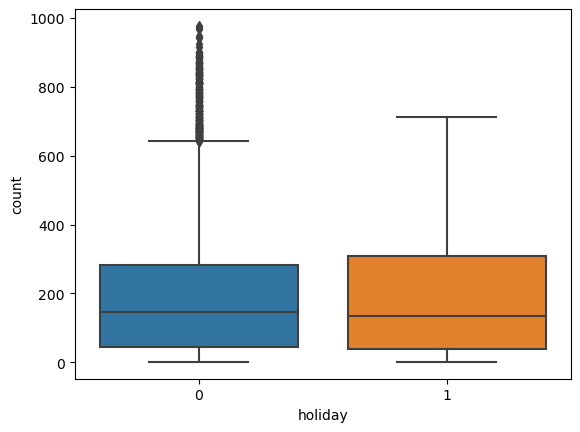

In [61]:
sns.boxplot(data = df,  # Plotting the boxplot for holiday
            x = 'holiday', 
            y = 'count')

plt.plot()  # Displaying the plot

***STEP-1*** : Set up Null Hypothesis

* **Null Hypothesis ( H0 )** - Holidays have no effect on the number of electric vehicles rented
* **Alternate Hypothesis ( HA )** - Holidays has some effect on the number of electric vehicles rented

***STEP-2*** : Checking for basic assumpitons for the hypothesis

* Distribution check using **QQ Plot**
* Homogeneity of Variances using **Levene's test**

***STEP-3***: Define Test statistics; Distribution of T under H0.

* If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.

***STEP-4***: Compute the p-value and fix value of alpha.

* We set our ***alpha to be 0.05***

***STEP-5***: Compare p-value and alpha.

* Based on p-value, we will accept or reject H0.
  1.   **p-val > alpha** : Accept H0
  2.   **p-val < alpha** : Reject H0

[]

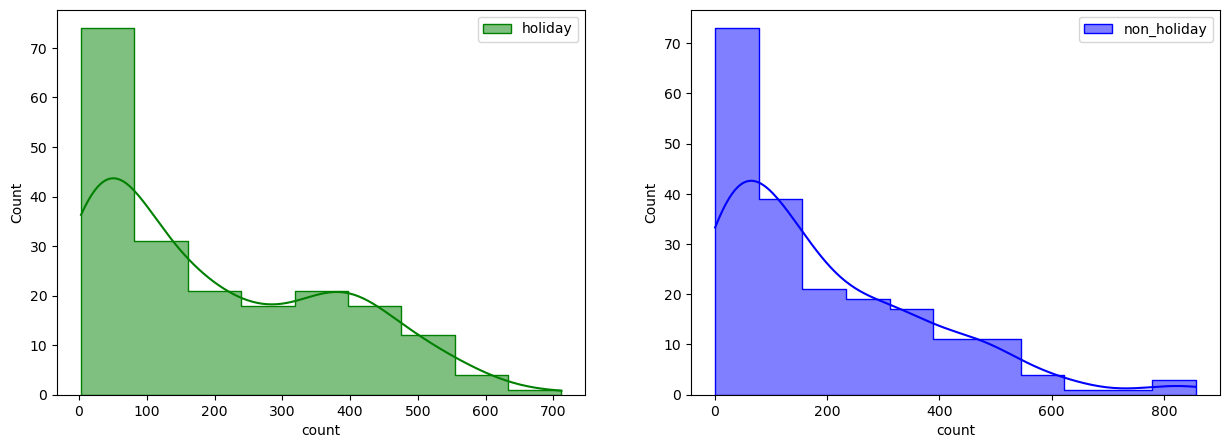

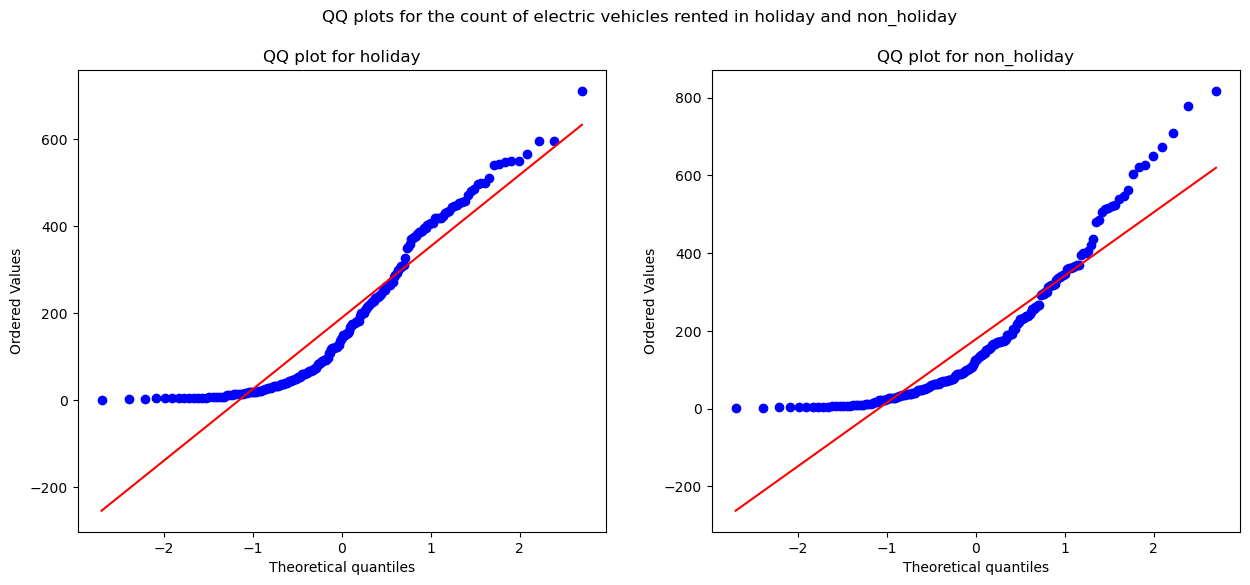

In [62]:
plt.figure(figsize = (15, 5))  # Plotting the matrix 15x10

plt.subplot(1, 2, 1)  # Plotting the histogram for holiday
sns.histplot(df.loc[df['holiday'] == 1, 'count'].sample(200),  
             element = 'step', 
             color = 'green', 
             kde = True, 
             label = 'holiday')
plt.legend()

plt.subplot(1, 2, 2)  # Plotting the histogram for non holiday
sns.histplot(df.loc[df['holiday'] == 0, 'count'].sample(200),  
             element = 'step', 
             color = 'blue', 
             kde = True, 
             label = 'non_holiday')
plt.legend()

plt.plot()  # Displying the plot

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)  # Plotting the QQ plot for holiday
plt.suptitle('QQ plots for the count of electric vehicles rented in holiday and non_holiday')
spy.probplot(df.loc[df['holiday'] == 1, 'count'].sample(200),  
             plot = plt, 
             dist = 'norm')
plt.title('QQ plot for holiday')

plt.subplot(1, 2, 2)  # Plotting the QQ plot for non holiday
spy.probplot(df.loc[df['holiday'] == 0, 'count'].sample(200), 
             plot = plt, 
             dist = 'norm')
plt.title('QQ plot for non_holiday')

plt.plot()  # Displying the plot

### <code style="background:yellow;color:black">Observation-</code> 

**It can be inferred from the above plot that the distributions do not follow normal distribution.**
 
### <code style="background:yellow;color:black">Next step-</code> 
 
**Applying Shapiro-Wilk test for normality.**
  
* $H_0$ : The sample **follows normal distribution**
* $H_1$ : The sample **does not follow normal distribution**
* alpha = 0.05 
* Test Statistics : **Shapiro-Wilk test for normality**

In [63]:
# Applying Shapiro-Wilk test for normality for holiday
test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')   
    

# Applying Shapiro-Wilk test for normality for non holiday    
test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 0, 'count'].sample(200))
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 6.920498028806232e-12
The sample does not follow normal distribution

p-value 3.670608088313099e-12
The sample does not follow normal distribution


### <code style="background:yellow;color:black">Next step-</code> 

**Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.**

In [64]:
transformed_holiday = spy.boxcox(df.loc[df['holiday'] == 1, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_holiday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')
    
    
transformed_non_holiday = spy.boxcox(df.loc[df['holiday'] == 0, 'count'].sample(5000))[0]
test_stat, p_value = spy.shapiro(transformed_non_holiday)
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.1349286782879062e-07
The sample does not follow normal distribution

p-value 5.256311945095798e-27
The sample does not follow normal distribution


### <code style="background:yellow;color:black">Observation-</code> 

**Even after applying the boxcox transformation on each of the "holiday" and "non_holiday" data, the samples do not follow normal distribution.**

### <code style="background:yellow;color:black">Next step-</code> 

**Homogeneity of Variances using Levene's test.**

In [65]:
# Null Hypothesis(H0) - Homogenous Variance 
# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('\nThe samples do not have  Homogenous Variance')
else:
    print('\nThe samples have Homogenous Variance ') 

p-value 0.9039315574336481

The samples have Homogenous Variance 


### <code style="background:yellow;color:black">Next step-</code> 

**Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.**

In [66]:
# Ho : No.of electric cycles rented is similar for holidays and non-holidays
# Ha : No.of electric cycles rented is not similar for holidays and non-holidays days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = spy.mannwhitneyu(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                      df.loc[df['holiday'] == 1, 'count'].sample(200))
print('P-value :',p_value)
if p_value < 0.05:
    print('\nNo.of electric cycles rented is not similar for holidays and non-holidays days')
else:
    print('\nNo.of electric cycles rented is similar for holidays and non-holidays')

P-value : 0.6339568000900266

No.of electric cycles rented is similar for holidays and non-holidays


### <code style="background:yellow;color:black">Observation-</code> 

**Therefore, the number of rental bikes is statistically similar for both holidays and non - holidays.**

<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Q4-Is the number of bikes rented is similar or different in different season?</code>

In [67]:
df.groupby(by = 'season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [68]:
df_season_spring = df.loc[df['season'] == 1, 'count']
df_season_summer = df.loc[df['season'] == 2, 'count']
df_season_fall = df.loc[df['season'] == 3, 'count']
df_season_winter = df.loc[df['season'] == 4, 'count']

len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(2686, 2733, 2733, 2734)

[]

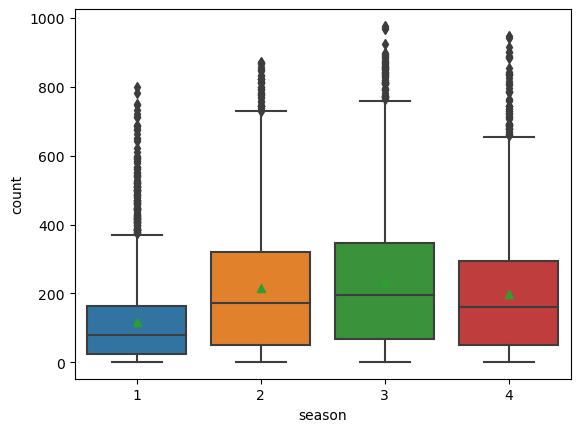

In [69]:
sns.boxplot(data = df,  # Plotting the boxplot for season
            x = 'season', 
            y = 'count', 
            showmeans = True)

plt.plot()  # Displaying the plot

***STEP-1*** : Set up Null Hypothesis

* **Null Hypothesis ( H0 )** - Mean of bike rented per hour is same for season 1,2,3 and 4.
* **Alternate Hypothesis ( HA )** -Mean of bike rented per hour is different for season 1,2,3 and 4.

***STEP-2*** : Checking for basic assumpitons for the hypothesis

* **Normality check** using QQ Plot. If the distribution is not normal, use **BOX-COX transform** to transform it to normal distribution.
* Homogeneity of Variances using **Levene's test**
* Each observations are **independent**.

***STEP-3***: Define Test statistics

* The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different. 
* **F = MSB / MSW**
* Under H0, the test statistic should follow **F-Distribution**.

***STEP-4***: Decide the kind of test.

* We will be performing **right tailed f-test**

***STEP-5***: Compute the p-value and fix value of alpha.

* We will be computing the anova-test p-value using the **f_oneway** function using scipy.stats.
* We set our alpha to be **0.05**

***STEP-6***: Compare p-value and alpha.

* Based on p-value, we will accept or reject H0.
    * p-val > alpha : Accept H0
    * p-val < alpha : Reject H0

The one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other. 

Specifically, it tests the null hypothesis (H0):

***µ1 = µ2 = µ3 = ..... = µk***


where, µ = group mean and k = number of groups. 

If, however, the one-way ANOVA returns a statistically significant result, we accept the alternative hypothesis (HA), which is that there are at least two group means that are statistically significantly different from each other.

[]

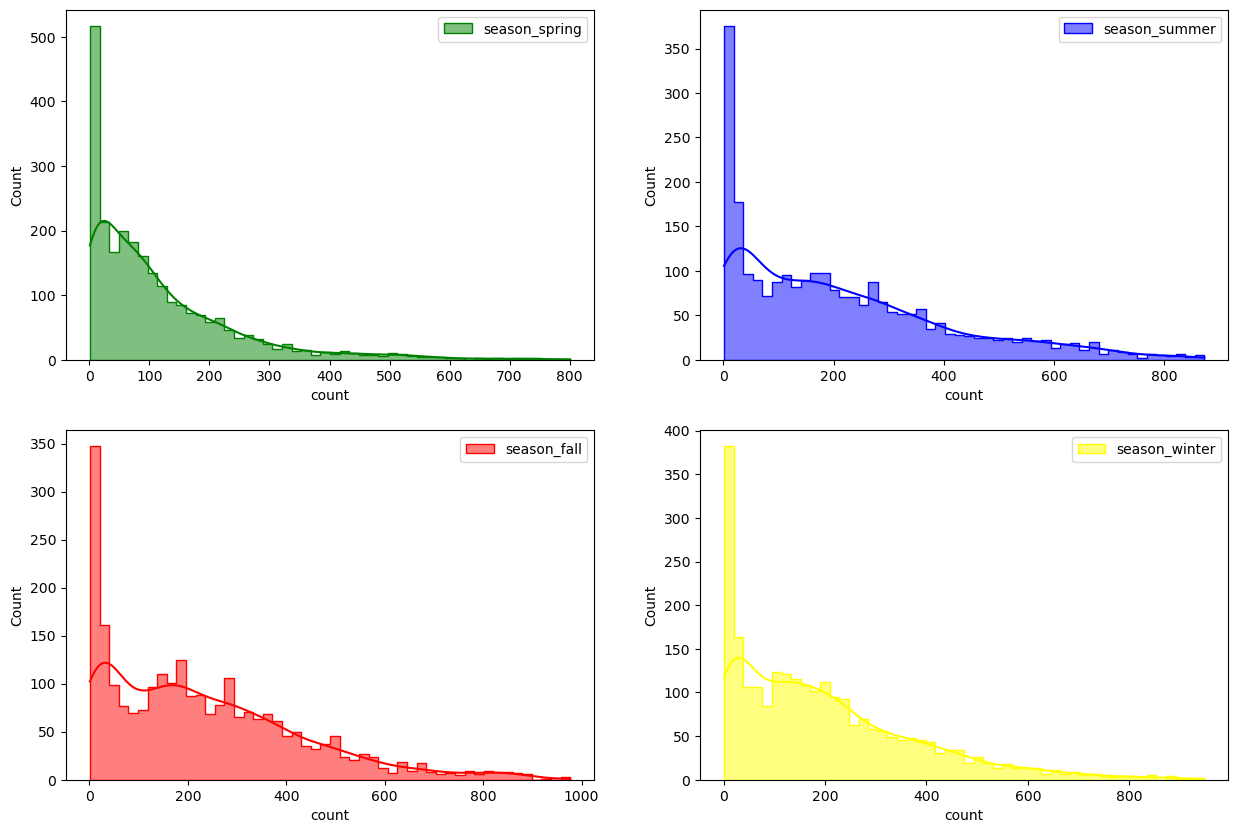

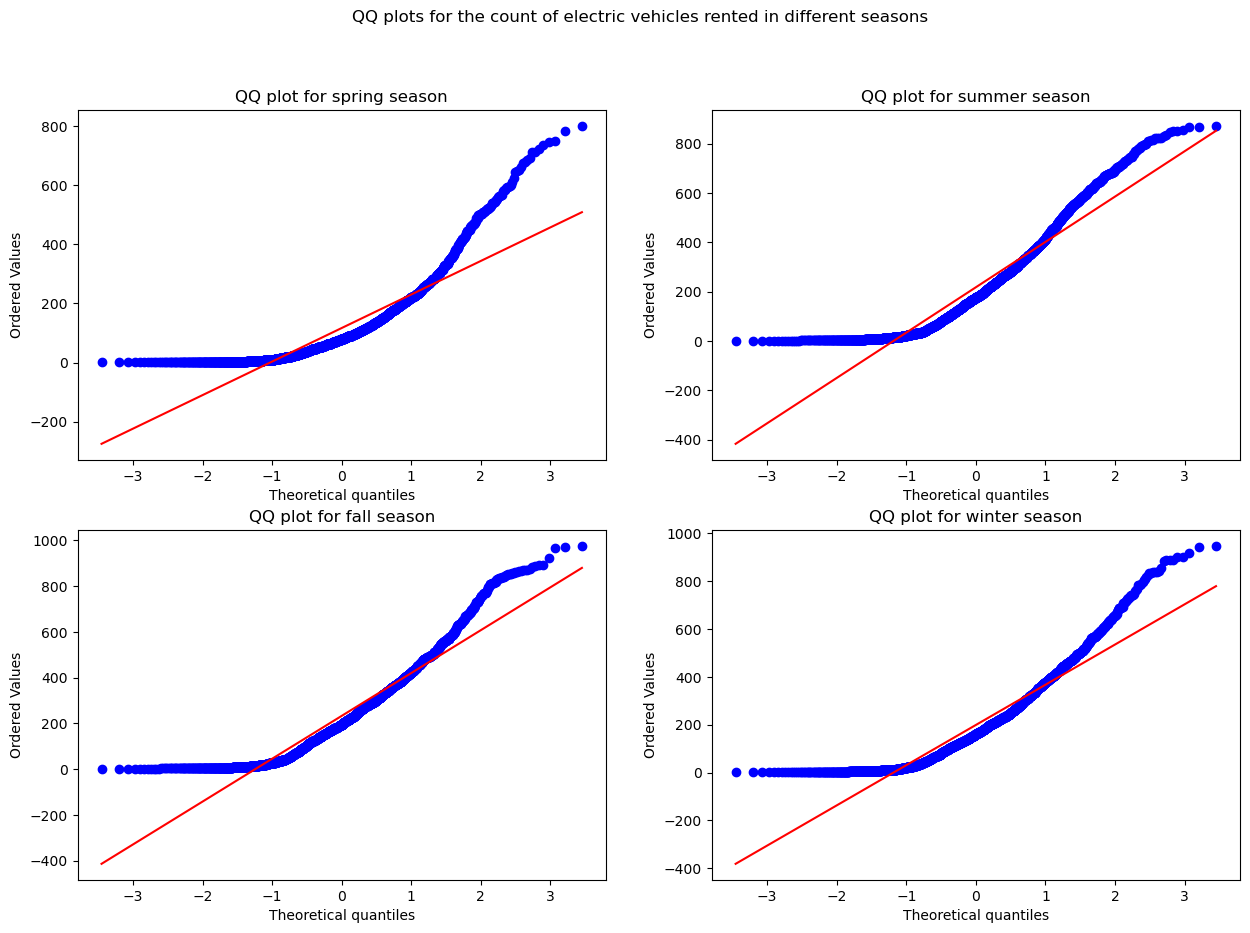

In [70]:
plt.figure(figsize = (15, 10))  # Plotting the matrix 15x10

plt.subplot(2, 2, 1)
sns.histplot(df_season_spring.sample(2500),  # Plotting the histogram for spring 
             bins = 50, 
             element = 'step', 
             color = 'green', 
             kde = True, 
             label = 'season_spring')
plt.legend()

plt.subplot(2, 2, 2)
sns.histplot(df_season_summer.sample(2500),  # Plotting the histogram for summer
             bins = 50,
             element = 'step', 
             color = 'blue', 
             kde = True, 
             label = 'season_summer')
plt.legend()

plt.subplot(2, 2, 3)
sns.histplot(df_season_fall.sample(2500),  # Plotting the histogram for fall
             bins = 50,
             element = 'step', 
             color = 'red', 
             kde = True, 
             label = 'season_fall')
plt.legend()

plt.subplot(2, 2, 4)
sns.histplot(df_season_winter.sample(2500),  # Plotting the histogram for winter
             bins = 50,
             element = 'step', 
             color = 'yellow', 
             kde = True, 
             label = 'season_winter')
plt.legend()

plt.plot()  # Displaying the plot



plt.figure(figsize = (15, 10))  # Plotting the matrix 15x10

plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons')
spy.probplot(df_season_spring.sample(2500),  # Plotting the QQ plot for spring
             plot = plt, 
             dist = 'norm')
plt.title('QQ plot for spring season')

plt.subplot(2, 2, 2) 
spy.probplot(df_season_summer.sample(2500),  # Plotting the QQ plot for summer 
             plot = plt, 
             dist = 'norm')
plt.title('QQ plot for summer season')

plt.subplot(2, 2, 3)
spy.probplot(df_season_fall.sample(2500),  # Plotting the QQ plot for fall
             plot = plt, 
             dist = 'norm')
plt.title('QQ plot for fall season')

plt.subplot(2, 2, 4)
spy.probplot(df_season_winter.sample(2500),  # Plotting the QQ plot for winter
             plot = plt, 
             dist = 'norm')
plt.title('QQ plot for winter season')

plt.plot()  # Displaying the plot

### <code style="background:yellow;color:black">Observation-</code> 

**Visual Tests to know if the samples follow normal distribution.**

### <code style="background:yellow;color:black">Next step-</code> 

* Applying Shapiro-Wilk test for normality
* $𝐻_0$ : The sample **follows normal distribution**  
* $𝐻_1$ : The sample **does not follow normal distribution**
* alpha = 0.05
* Test Statistics : **Shapiro-Wilk test for normality**

In [71]:
# Applying Shapiro-Wilk test for normality for spring
test_stat, p_value = spy.shapiro(df_season_spring.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')   
    

# Applying Shapiro-Wilk test for normality for summer
test_stat, p_value = spy.shapiro(df_season_summer.sample(2500))
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  
    

# Applying Shapiro-Wilk test for normality for fall
test_stat, p_value = spy.shapiro(df_season_fall.sample(2500))
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 
    

# Applying Shapiro-Wilk test for normality for winter    
test_stat, p_value = spy.shapiro(df_season_winter.sample(2500))
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 0.0
The sample does not follow normal distribution

p-value 1.3399026460321524e-37
The sample does not follow normal distribution

p-value 2.8099822244562896e-35
The sample does not follow normal distribution

p-value 4.595162587066912e-38
The sample does not follow normal distribution


### <code style="background:yellow;color:black">Next step-</code> 

**Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.**

In [72]:
transformed_df_season_spring = spy.boxcox(df_season_spring.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_spring)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')
    
    
transformed_df_season_summer = spy.boxcox(df_season_summer.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_summer)
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 
    
    
transformed_df_season_fall = spy.boxcox(df_season_fall.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_fall)
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 
    
    
transformed_df_season_winter = spy.boxcox(df_season_winter.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_winter)
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 1.6311583457028e-16
The sample does not follow normal distribution

p-value 4.447289307467687e-21
The sample does not follow normal distribution

p-value 3.479109135597747e-21
The sample does not follow normal distribution

p-value 5.098068242176883e-20
The sample does not follow normal distribution


### <code style="background:yellow;color:black">Observation-</code> 

**Even after applying the boxcox transformation on each of the season data, the samples do not follow normal distribution.**
 
### <code style="background:yellow;color:black">Next step-</code> 

**Homogeneity of Variances using Levene's test.**

In [73]:
# Null Hypothesis(H0) - Homogenous Variance 
# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(df_season_spring.sample(2500),
                                df_season_summer.sample(2500),
                                df_season_fall.sample(2500),
                                df_season_winter.sample(2500))
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 1.624414158569863e-110
The samples do not have  Homogenous Variance


### <code style="background:yellow;color:black">Next step-</code> 

**Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.**

In [74]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05

alpha = 0.05

test_stat, p_value = spy.kruskal(df_season_spring, df_season_summer, df_season_fall,df_season_winter) 

print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151


### <code style="background:yellow;color:black">Next step-</code> 

**Comparing p value with significance level.**

In [75]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


### <code style="background:yellow;color:black">Observaton-</code> 

**Therefore, the average number of rental bikes is statistically different for different seasons.**

<hr style="border: 1px solid gray;">

### <code style="background:yellow;color:black">Q5- Is weather dependent on the season?</code>

In [76]:
df[['weather', 'season']].describe()

,weather,season
count,10886,10886
unique,4,4
top,1,4
freq,7192,2734


### <code style="background:yellow;color:black">Observation-</code> 

**It is clear from the above statistical description that both 'weather' and 'season' features are categorical in nature.**

***STEP-1*** : Set up Null Hypothesis

* **Null Hypothesis ( H0 )** - Weather is independent of season
* **Alternate Hypothesis ( HA )** - Weather is dependent of seasons.

***STEP-2***: Define Test statistics

* Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic should follow **Chi-Square Distribution**.

***STEP-3***: Checking for basic assumptons for the hypothesis (Non-Parametric Test)

* The data in the cells should be **frequencies**, or **counts** of cases.
* The levels (or categories) of the variables are **mutually** **exclusive**. That is, a particular subject fits into one and only one level of each of the variables. 
* There are 2 variables, and both are measured as **categories**.
* The **value of the cell expecteds should be 5 or more** in at least 80% of the cells, and no cell should have an expected of less than one (3).

***STEP-4***: Compute the p-value and fix value of alpha.

* We will be computing the chi square-test p-value using the chi2_contingency function using scipy.stats. We set our **alpha to be 0.05**

***STEP-5***: Compare p-value and alpha.

* Based on p-value, we will accept or reject H0.
    1. **p-val > alpha** : Accept H0
    2. **p-val < alpha** : Reject H0

The **Chi-square statistic is a non-parametric** (distribution free) tool designed to analyze group differences when the dependent variable is measured at a nominal level. Like all non-parametric statistics, the Chi-square is robust with respect to the distribution of the data. Specifically, it does not require equality of variances among the study groups or homoscedasticity in the data

In [77]:
# First, finding the contingency table such that each value is the total number of total bikes rented 
# for a particular season and weather

cross_table = pd.crosstab(index = df['season'], 
                          columns = df['weather'], 
                          values = df['count'], 
                          aggfunc = np.sum).replace(np.nan, 0)

cross_table

weather,1,2,3,4
season,,,,
1,223009.0,76406.0,12919.0,164.0
2,426350.0,134177.0,27755.0,0.0
3,470116.0,139386.0,31160.0,0.0
4,356588.0,157191.0,30255.0,0.0


### <code style="background:yellow;color:black">Observation-</code> 

**Since the above contingency table has one column in which the count of the rented electric bike is less than 5 in most of the cells, we can remove the weather 4 and then proceed further.**

In [78]:
cross_table = pd.crosstab(index = df['season'], 
                          columns = df.loc[df['weather'] != 4, 'weather'], 
                          values = df['count'], 
                          aggfunc = np.sum).to_numpy()[:, :3]

cross_table

array([[223009,  76406,  12919],
       [426350, 134177,  27755],
       [470116, 139386,  31160],
       [356588, 157191,  30255]], dtype=int64)

In [79]:
chi_test_stat, p_value, dof, expected = spy.chi2_contingency(observed = cross_table)

print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : \n", expected)

Test Statistic = 10838.372332480214
p value = 0.0
-----------------------------------------------------------------
Expected : 
 [[221081.86259035  75961.44434981  15290.69305984]
 [416408.3330293  143073.60199337  28800.06497733]
 [453484.88557396 155812.72247031  31364.39195574]
 [385087.91880639 132312.23118651  26633.8500071 ]]


### <code style="background:yellow;color:black">Observation-</code> 

**Comparing p value with significance level.**

In [80]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


### <code style="background:yellow;color:black">Observation-</code> 

**Therefore, there is statistically significant dependency of weather and season based on the number of bikes rented.**

<hr style="border: 1px solid gray;">

# <code style="background:yellow;color:black">Insights:</code>

- The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.<br><br>

 - Out of every 100 users, around 19 are casual users and 81 are registered users.<br><br>
 
 - The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.<br><br>
 
 - There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.<br><br>
  
  - The average hourly count of rental bikes is the lowest in the month of January followed by February and March.<br><br>
 
 - There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.<br><br>
 
 - More than 80 % of the time, the temperature is less than 28 degrees celcius.<br><br>
 
 - More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.<br><br>
 
 - More than 85 % of the total, windspeed data has a value of less than 20.<br><br>
 
 - The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.<br><br>
 
 - The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.<br><br>
 
 - There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.<br><br>
 
 - The hourly total number of rental bikes is statistically different for different weathers.<br><br>
 
 - There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.<br><br>
 
 - The hourly total number of rental bikes is statistically different for different seasons.

<hr style="border: 1px solid gray;">

# <code style="background:yellow;color:black">Recommendations:</code>

 - **Seasonal Marketing**: Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.<br><br>

 - **Time-based Pricing**: Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.<br><br>

 - **Weather-based Promotions**: Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.<br><br>

 - **User Segmentation**: Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.<br><br>

 - **Optimize Inventory**: Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.<br><br>

 - **Improve Weather Data Collection**: Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.<br><br>

 - **Customer Comfort**: Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.<br><br>

 - **Collaborations with Weather Services**: Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.<br><br>

 - **Seasonal Bike Maintenance**: Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.<br><br>
 
 - **Customer Feedback and Reviews**: Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.<br><br>
 
 - **Social Media Marketing**: Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.<br><br>
 
 - **Special Occasion Discounts**: Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.
